# Classifying Healthcare Analytics

## 1 Introduction

**Background**: The recent Covid-19 pandemic has increased global attention to healthcare management. Data science has numerous applications in healthcare management, with predicting patient Length of Stay (LOS) being a crucial metric. LOS helps hospitals analyze high-risk patients, optimize their treatment plans, improve overall operational efficiency, and minimize infection risks for healthcare workers and visitors.

**Project Goal**: As a data scientist at the non-profit organization HealthMan, the project's objective is to accurately predict each patient's Length of Stay, allowing hospitals to better allocate resources and manage healthcare services. LOS categories range from 0-10 days to over 100 days.

**Implementation Steps**:
1. Load and Analyse Data: Conduct a basic analysis based on the available dataset.
2. Data Preprocessing: Process the dataset, using one-hot encoding for categorical features and ordinal encoding for ordered features.
3. Feature Selection: Analyze and select impactful features from the preprocessed data.
4. Model Selection and Evaluation: Train various models and evaluate their performance, ultimately choosing the best model.
5. Analyze and Discuss the Model: Review the chosen model's strengths and weaknesses and provide suggestions for improvement.
6. Conclusion: Summarize the project outcomes and any insights gained throughout the process.

## 2 Model Training

### 2.1 Load and analyse data

The task in this section is to successfully load the dataset into the project and analyze the dataset’s mean, median, minimum values, standard deviation, and the percentage of missing values. By conducting a basic analysis of the data, we can gain a fundamental understanding of the dataset’s characteristics.

#### 2.1.1 Load Library

Load the library which will be used in the project.

In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn import neighbors
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, KFold, LeaveOneOut, train_test_split, cross_val_score
from sklearn.metrics import balanced_accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#### 2.1.2 Analysis Data

Conduct basic data analysis:
1. Derive statistics of the target feature (Stay).
2. Calculate missing values and remove entries with missing data (in the processing stage, we assume data with missing values may also have issues in truthfulness and accuracy).
3. Compute the mean, maximum, minimum, and distribution of values for each column with numerical content.
4. Visualize the data to gain an initial understanding of the distribution of each attribute.

In [2]:
# Database
df = pd.read_csv ("train_data.csv",encoding='utf-8');

In [3]:
# index of each column
ip_idx = list (range (0, df.shape[1]-1)); # Just getting the index except the last column, as it is the target variavke
# name of each column
ip_attr_names = df.columns[ip_idx];

In [4]:
# index of target ('Stay')
target_idx = df.shape[1] - 1;
# name of target ('Stay')
target = df.columns[target_idx];

In [5]:
# Statistical analysis of the target feature
df.iloc[:,target_idx].value_counts ()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [6]:
# Obtain missing values in the dataset.
df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [7]:
# Calculate the proportion of missing values.
df_null_value_percentage = 100*(df.isnull().sum()/len(df))
df_null_value_percentage

case_id                              0.000000
Hospital_code                        0.000000
Hospital_type_code                   0.000000
City_Code_Hospital                   0.000000
Hospital_region_code                 0.000000
Available Extra Rooms in Hospital    0.000000
Department                           0.000000
Ward_Type                            0.000000
Ward_Facility_Code                   0.000000
Bed Grade                            0.035486
patientid                            0.000000
City_Code_Patient                    1.423197
Type of Admission                    0.000000
Severity of Illness                  0.000000
Visitors with Patient                0.000000
Age                                  0.000000
Admission_Deposit                    0.000000
Stay                                 0.000000
dtype: float64

In [8]:
# delete the missing values
df.dropna(inplace = True)
# get the data shap
df.shape

(313793, 18)

In [9]:
# describe the database
# mean, median, min, standard deviation
df.describe ()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000
mean,158937.911120,18.326419,4.778169,3.196419,2.622952,65743.029382,7.252447,3.280857,4881.893165
std,91939.506976,8.633613,3.103237,1.167924,0.872618,37978.083237,4.745243,1.761758,1086.243945
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79271.000000,11.000000,2.000000,2.000000,2.000000,32833.000000,4.000000,2.000000,4188.000000
50%,158950.000000,19.000000,5.000000,3.000000,3.000000,65735.000000,8.000000,3.000000,4742.000000
75%,238399.000000,26.000000,7.000000,4.000000,3.000000,98472.000000,8.000000,4.000000,5410.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [10]:
# show the df
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


#### 2.1.3 Data Visualisation

To gain a more intuitive understanding of the data, I used a histogram and a box plot for data visualization.

**Histogram**: Illustrates the distribution of different outcomes within each feature.

**Box plot**: Reflects the distribution of data within numerical features.

##### Histogram

A histogram is a statistical report chart used to display the distribution of observation values in one or more continuous intervals (also known as bins). It implements the visualization of data distribution by dividing data into continuous intervals or bars, and using the height of the bars to represent the number of observational values in each interval.

In this part, the histogram include:

- X-axis (horizontal axis): Represents different situations of a certain feature.

- Y-axis (vertical axis): Represents the situations of the target feature (Stay).

- Bins: The intervals into which data is divided, each interval's data quantity is represented by height.

<Figure size 640x480 with 0 Axes>

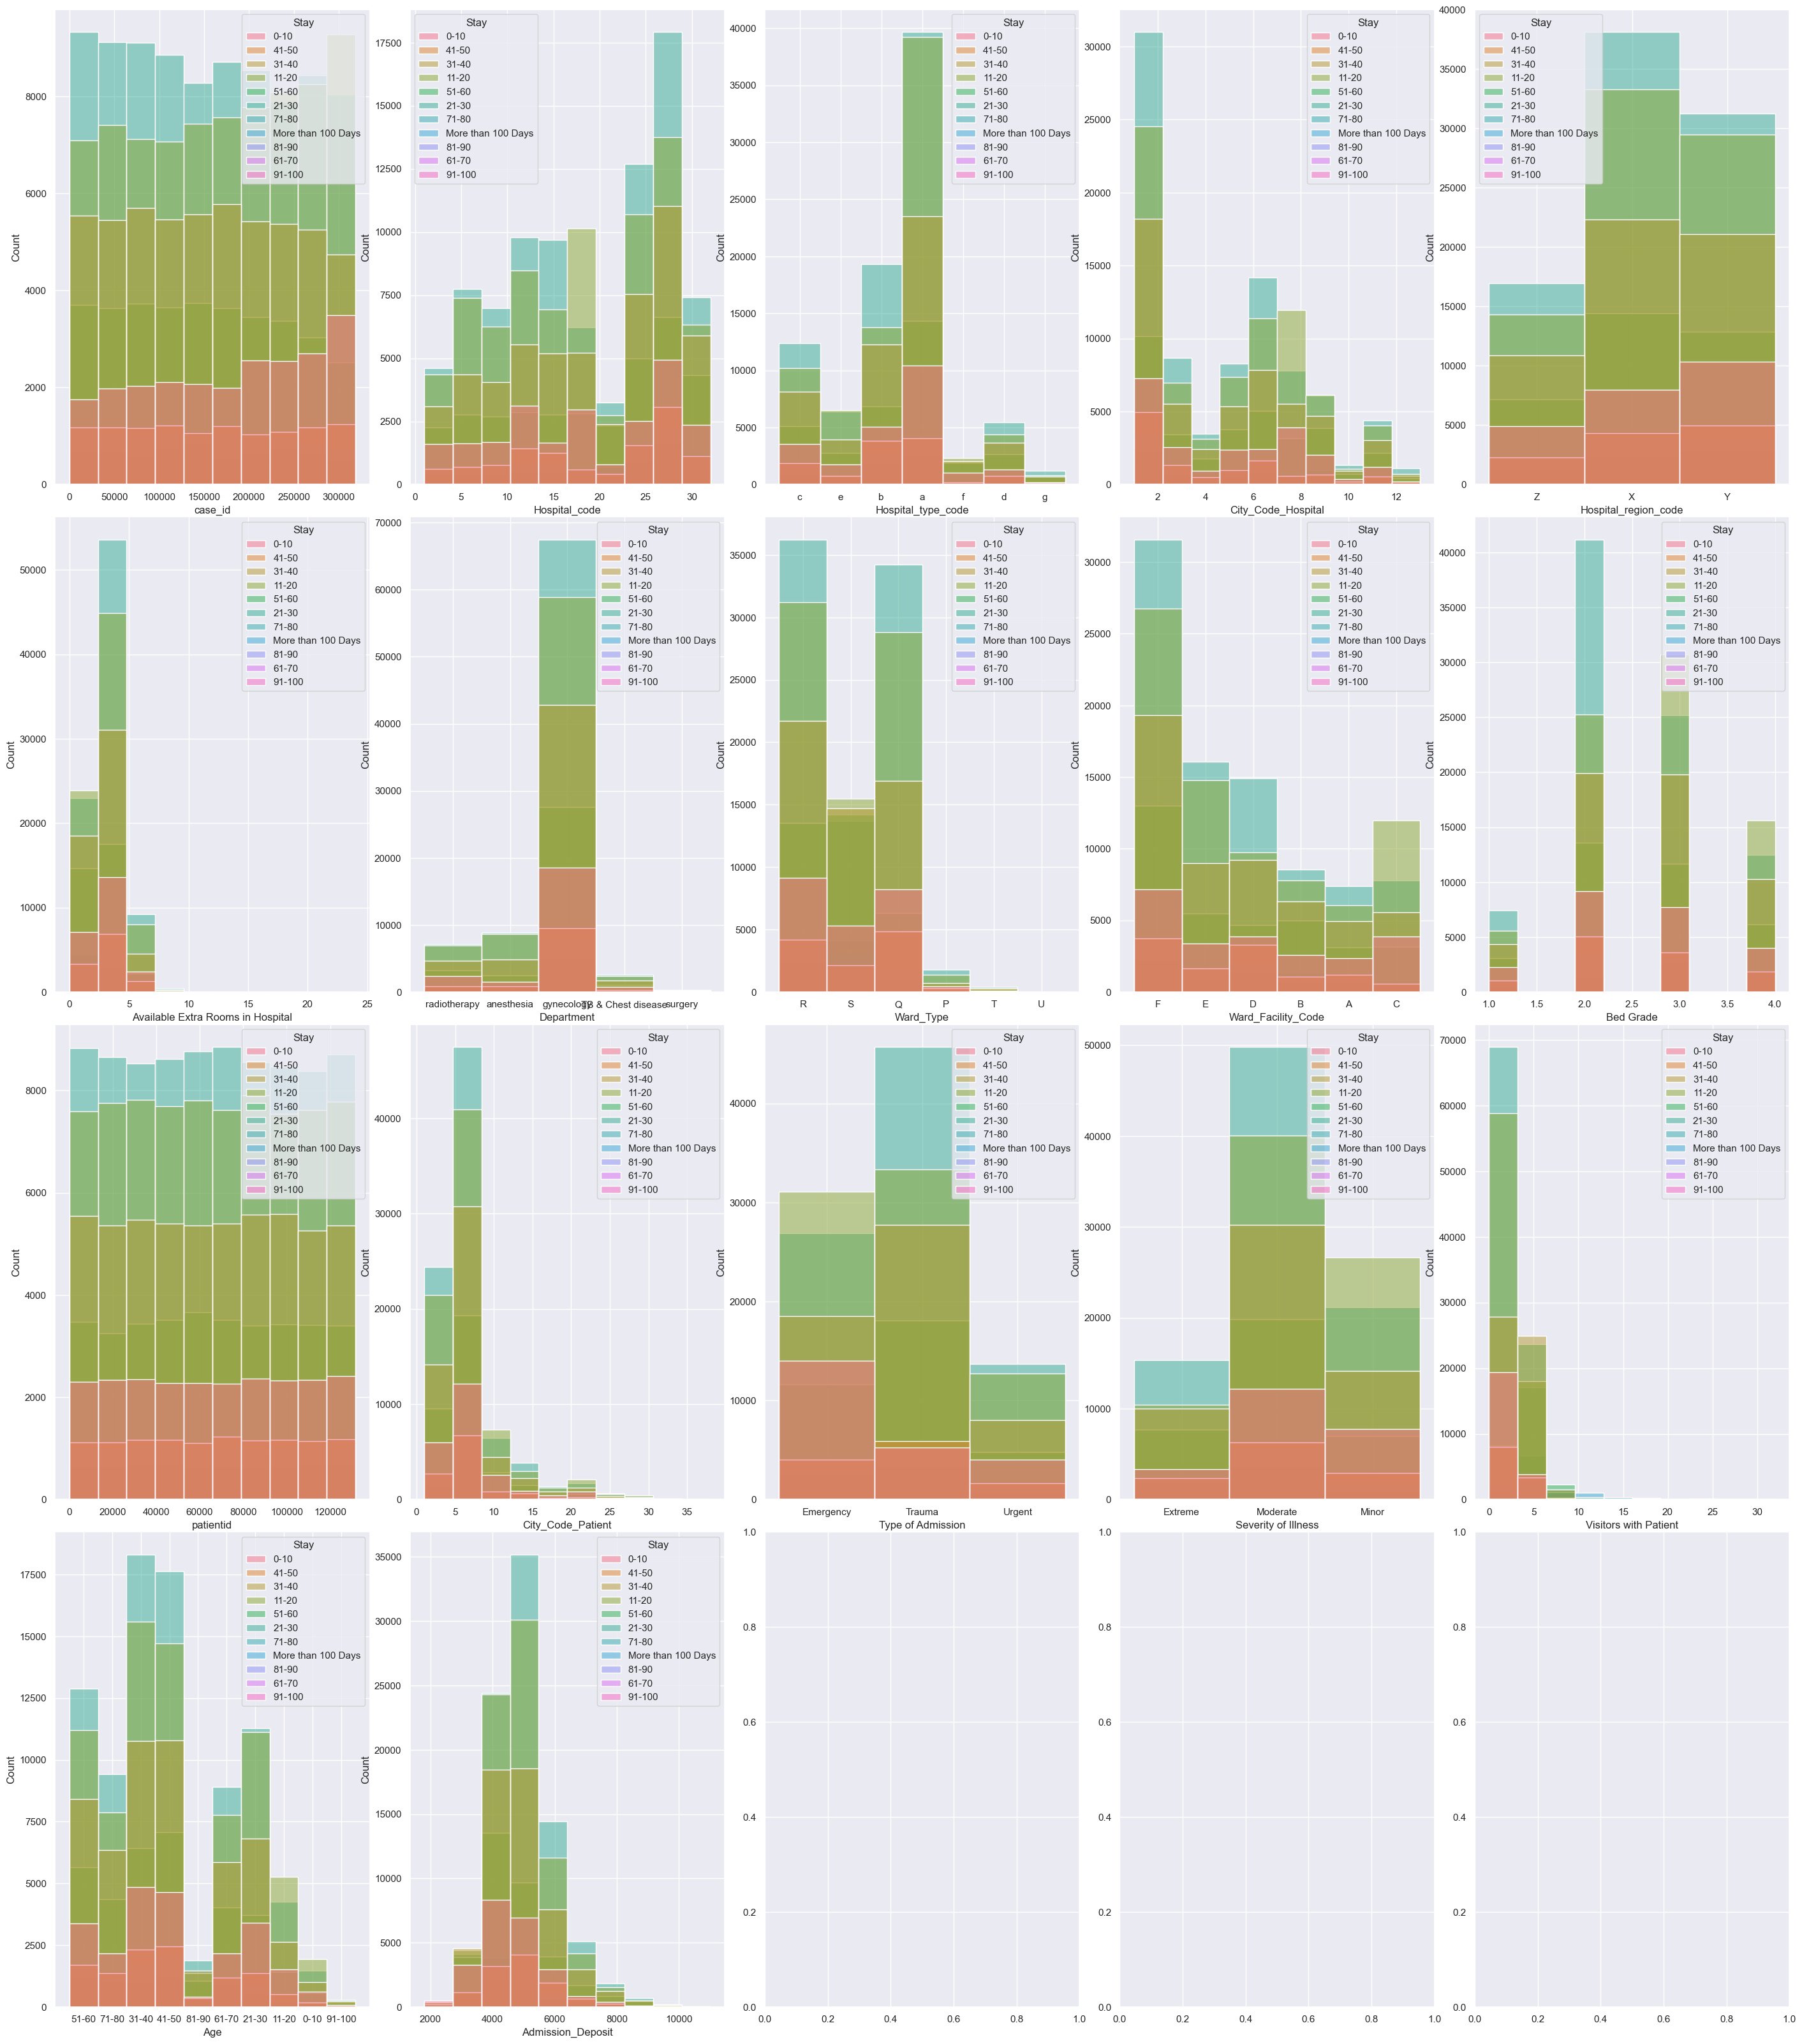

In [11]:
# analysis the database using the histogram
sns.set ();
plt.clf()
plot_col = int (np.ceil (np.sqrt (len (ip_attr_names))));
plot_row = int (np.ceil (len (ip_idx) / plot_col));

fig, axes = plt.subplots (plot_row, plot_col, figsize = (7 * 4, plot_row * 8));

# use tight_layout
fig.tight_layout();


for i in ip_idx:
    sns.histplot(df, x=ip_attr_names[i], hue=target, ax=axes[int(i/plot_col), int(i % plot_col)], bins=10, kde=False);
plt.show();

##### Box plot

Box plot (also known as box-and-whisker plot or box chart) is a type of statistical chart used to display the distribution and central tendency of data. Box plots provide an intuitive way to view the quartiles of the data, thereby understanding the distribution and outliers of the data. Here are the main components of the box plot:

- Minimum (Minimum): the smallest value of the data but usually does not include outliers.

- First quartile (Q1/25th Percentile): the value at the first dividing point when the data set is divided into four equal parts. That is, in the data set, 25% of the data values are less than or equal to Q1.

- Median (Median/Q2/50th Percentile): The value in the exact middle of the dataset. When the data is arranged from small to large, the median divides the dataset into two equal parts. 50% of the data values are less than or equal to the median.

- Third quartile (Q3/75th Percentile): the value at the third dividing point when the data set is divided into four equal parts. That is, in the dataset, 75% of the data values are less than or equal to Q3.

- Maximum (Maximum): the largest value of the data, but usually does not include outliers.

<Figure size 640x480 with 0 Axes>

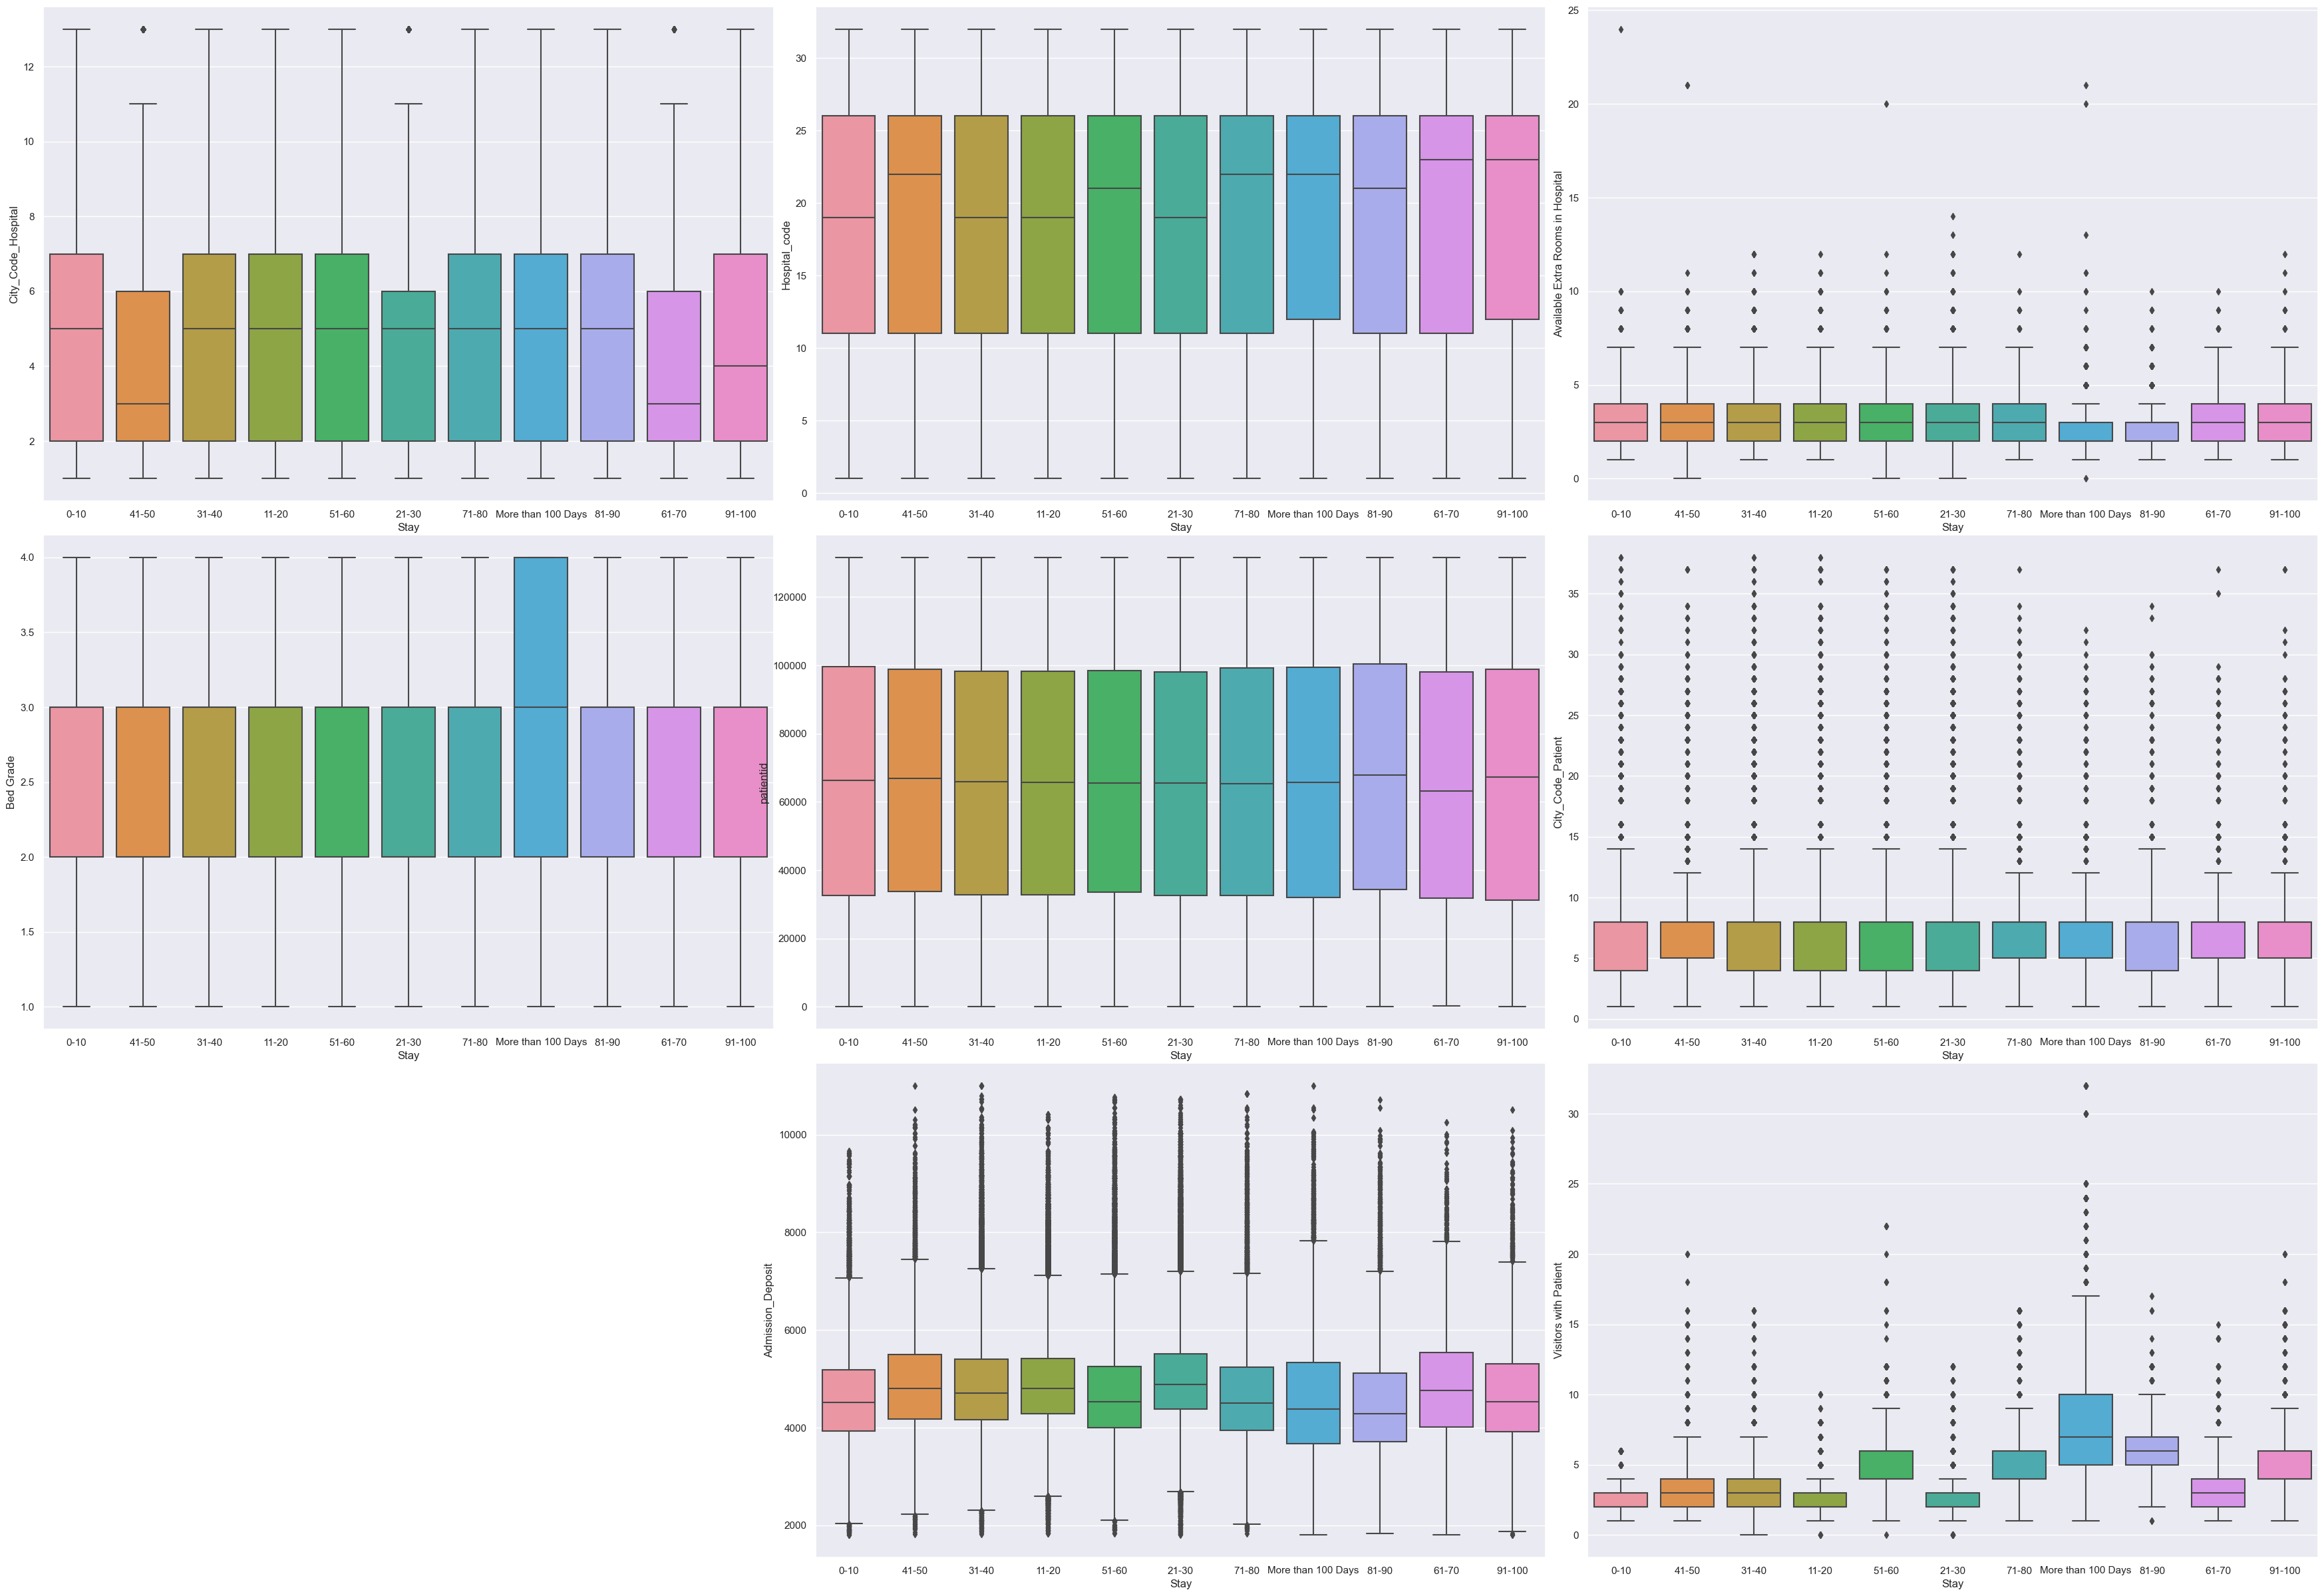

In [12]:
# analysis the database using the box plot (just for the attribute which have the number values)
sns.set()
plt.clf()
att_index=[1,3,5,9,10,11,14,16]
fig, axes = plt.subplots(3, 3, figsize=(35, 24))
fig.tight_layout()

for i in att_index:
    sns.boxplot(data=df, x=target, y=ip_attr_names[i], ax=axes[int(att_index.index(i)/3), int(i % 3)])
axes[-1][0].remove()

plt.show()

### 2.2 Data Cleaning

This section mainly involves a simple data preprocessing. After analysis, it is known that the input data mainly falls into three types: numerical, categorical, and ordinal attributes. During the model training process, the numerical type is relatively easier to handle. Therefore, in this part, it is necessary to transform the categorical and ordinal attributes into numerical types. In addition, unique attributes such as ID should be removed as they do not have any impact on the model analysis.
1. Remove irrelevant attributes
2. For categorical attributes: use one-hot encoding to expand attributes and convert them into binary values (0s and 1s)
3. For ordinal attributes: redefine them as numerical based on their levels
4. Standardize the data to prepare for training the model later.

#### 2.2.1 Remove irrelevant attributes

In [13]:
# all coloums
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

I believe that attributes such as event ID, hospital ID, city ID, hospital region, patient ID, and patient city have no significance. Therefore, I choose to delete these attributes. After that, the number of columns will reduce and it can make the speed of training model more faster after one-hot

In [14]:
df = df.drop(['case_id','Hospital_code','City_Code_Hospital','Hospital_region_code','Hospital_code','patientid','City_Code_Patient'],axis=1)

#### 2.2.2 Deal with categorical attributes (one-hot)

Based on data analysis, it is determined that the four attributes: `hospital type`, `department`, `ward type`, and `ward level`, are categorical attributes and should be treated using one-hot encoding.

One-hot encoding is a crucial process that converts categorical attributes into numerical values, which is instrumental for subsequent model training.

In [15]:
# one-hot
# this need to be one hot encoded
one_hot_columns = ["Hospital_type_code","Department","Ward_Type","Ward_Facility_Code"]

For each attribute, first perform one-hot encoding to expand the attribute, then merge the expanded part onto the original dataset, and delete the original attribute columns.

In [16]:
# Iterate through the columns that require one-hot encoding. For each column, apply one-hot encoding, then merge the results and delete the original column.
for column in one_hot_columns:
    df_one_hot = pd.get_dummies(df[column],prefix=column)
    df = pd.concat([df, df_one_hot], axis=1)
    df.drop(column, axis=1, inplace = True)

In [17]:
# show the df which after one-hot
df

,Available Extra Rooms in Hospital,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Hospital_type_code_a,Hospital_type_code_b,...,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F
0,3,2.0,Emergency,Extreme,2,51-60,4911.0,0-10,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2,2.0,Trauma,Extreme,2,51-60,5954.0,41-50,0,0,...,0,1,0,0,0,0,0,0,0,1
2,2,2.0,Trauma,Extreme,2,51-60,4745.0,31-40,0,0,...,0,1,0,0,0,0,0,0,1,0
3,2,2.0,Trauma,Extreme,2,51-60,7272.0,41-50,0,1,...,1,0,0,0,0,0,0,1,0,0
4,2,2.0,Trauma,Extreme,2,51-60,5558.0,41-50,0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,3,4.0,Emergency,Moderate,3,41-50,4144.0,11-20,1,0,...,0,0,0,0,0,0,0,0,0,1
318434,2,4.0,Urgent,Moderate,4,81-90,6699.0,31-40,1,0,...,0,0,0,0,0,0,0,0,1,0
318435,3,4.0,Emergency,Minor,3,71-80,4235.0,11-20,1,0,...,1,0,0,0,0,0,0,0,0,1
318436,3,3.0,Trauma,Minor,5,11-20,3761.0,11-20,0,1,...,0,0,0,0,0,0,0,1,0,0


#### 2.2.3 Deal with ordered attribute

Dealing with ordinal attributes:
- Retrieve the values of the attribute.
- Sort the values of the attribute in ascending order.
- Assign values in the order (0, 1, 2...) to the attribute.

Based on data analysis, we know that the four columns, `Type of Admission`, `Severity of Illness`, `Age`, and `Stay` are ordinal.

In [19]:
# deal with the ordered column
ordered_columns = ["Type of Admission","Severity of Illness","Age","Stay"]
ordered_result = {}
# find the different result of each ordered column
for column in ordered_columns:
    ordered_result[column] = df[column].unique()
ordered_result

{'Type of Admission': array(['Emergency', 'Trauma', 'Urgent'], dtype=object),
 'Severity of Illness': array(['Extreme', 'Moderate', 'Minor'], dtype=object),
 'Age': array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
        '11-20', '0-10', '91-100'], dtype=object),
 'Stay': array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
        'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)}

In [20]:
# make the result ordered
for column in ordered_columns:
    ordered_result[column] = sorted(ordered_result[column])

In [21]:
# show the result
ordered_result

{'Type of Admission': ['Emergency', 'Trauma', 'Urgent'],
 'Severity of Illness': ['Extreme', 'Minor', 'Moderate'],
 'Age': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100'],
 'Stay': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100',
  'More than 100 Days']}

In [22]:
# continus to make it order
admission = ordered_result['Type of Admission']
admission.insert(0, admission.pop(admission.index('Urgent')))
admission.insert(0, admission.pop(admission.index('Trauma')))

illness = ordered_result['Severity of Illness']
illness.insert(0, illness.pop(illness.index('Moderate')))
illness.insert(0, illness.pop(illness.index('Minor')))

In [23]:
# show the result (order successful)
ordered_result

{'Type of Admission': ['Trauma', 'Urgent', 'Emergency'],
 'Severity of Illness': ['Minor', 'Moderate', 'Extreme'],
 'Age': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100'],
 'Stay': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100',
  'More than 100 Days']}

In [24]:
# Replace the order with numbers.
for column in ordered_result:
    df[column] = df[column].apply(lambda x: ordered_result[column].index(x))

In [25]:
# show the df
df

,Available Extra Rooms in Hospital,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Hospital_type_code_a,Hospital_type_code_b,...,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F
0,3,2.0,2,2,2,5,4911.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2,2.0,0,2,2,5,5954.0,4,0,0,...,0,1,0,0,0,0,0,0,0,1
2,2,2.0,0,2,2,5,4745.0,3,0,0,...,0,1,0,0,0,0,0,0,1,0
3,2,2.0,0,2,2,5,7272.0,4,0,1,...,1,0,0,0,0,0,0,1,0,0
4,2,2.0,0,2,2,5,5558.0,4,0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,3,4.0,2,1,3,4,4144.0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
318434,2,4.0,1,1,4,8,6699.0,3,1,0,...,0,0,0,0,0,0,0,0,1,0
318435,3,4.0,2,0,3,7,4235.0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
318436,3,3.0,0,0,5,1,3761.0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


#### 2.2.4 Data Normalisation

Data Standardization:
- For decision trees, data standardization is not necessary.
- For k-nearest neighbors (knn), data standardization is needed.

I have adopted a common data preprocessing method known as Min-Max Normalization, also referred to as Normalization. The primary goal of this method is to eliminate the impact of the different scales of data features and ensure that various indicators can be compared.

The fundamental idea of this method is to proportionally scale the original data to a preset range, typically the [0,1] interval. The specific mathematical formula is as follows:

   X' = (X - Xmin) / (Xmax - Xmin)

Where:

- X stands for the original data that needs to be normalized;
- Xmin and Xmax are the minimum and maximum values in the dataset, respectively;
- X' represents the value after normalization.

In [30]:
# Nornalisation
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

stander_df = df.copy()

# delete the target
cols_to_standardize = [c for c in df.columns if c != 'Stay']
stander_df[cols_to_standardize] = sc.fit_transform(df[cols_to_standardize])

In [31]:
# show the ordered df
stander_df

,Available Extra Rooms in Hospital,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Hospital_type_code_a,Hospital_type_code_b,...,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F
0,0.125000,0.333333,1.0,1.0,0.06250,0.555556,0.337858,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.083333,0.333333,0.0,1.0,0.06250,0.555556,0.451129,4,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.083333,0.333333,0.0,1.0,0.06250,0.555556,0.319831,3,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.083333,0.333333,0.0,1.0,0.06250,0.555556,0.594266,4,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.083333,0.333333,0.0,1.0,0.06250,0.555556,0.408123,4,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,0.125000,1.000000,1.0,0.5,0.09375,0.444444,0.254561,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
318434,0.083333,1.000000,0.5,0.5,0.12500,0.888889,0.532037,3,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
318435,0.125000,1.000000,1.0,0.0,0.09375,0.777778,0.264444,1,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
318436,0.125000,0.666667,0.0,0.0,0.15625,0.111111,0.212967,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### 2.3 Attribute Selection

Feature Selection, also known as variable selection, attribute selection or variable pruning, is the process of selecting relevant features (i.e., variables, predictors) to construct a model. Feature selection is an important step in machine learning and statistical modeling, aiming to select the most relevant features and exclude irrelevant features, in order to create efficient, accurate, and computationally intensive models.

This part mainly involves attribute selection, selecting the features that have a significant impact on the target attribute. The method used is forward selection, where we evaluate the impact score of each feature on the target attribute and select the features with higher scores as influential features.

#### 2.3.1 Variable reserve

In [32]:
# the index of each column
df_idx = list (range (0, df.shape[1])); # Just getting the index except the last column, as it is the target variavke
df_idx.remove(7)
df_target_idx = df.columns.get_loc('Stay')
# x will have the descriptive attributes
# y will have the target
# just choose 500 data
x = df.iloc[:500,df_idx]
y = df.iloc[:500,df_target_idx]

In [33]:
# show the x
x

,Available Extra Rooms in Hospital,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,...,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F
0,3,2.0,2,2,2,5,4911.0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,2,2.0,0,2,2,5,5954.0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,2,2.0,0,2,2,5,4745.0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,2,2.0,0,2,2,5,7272.0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,2,2.0,0,2,2,5,5558.0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,3,3.0,0,0,4,0,3908.0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
505,4,4.0,1,0,2,0,5334.0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
506,2,3.0,0,1,2,7,3790.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
507,2,3.0,2,1,2,7,4977.0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [34]:
# count the y
y.value_counts ()

2     151
1      98
3      87
5      53
0      41
4      29
7      16
8      12
10      9
6       2
9       2
Name: Stay, dtype: int64

#### 2.3.2 Feature correlation visualization

A heatmap of features is a graphical representation used to depict the correlation or interrelationship among the dimensions of a multi-dimensional dataset. In a heatmap, various features or dimensions correspond to rows and columns, where each cell (or square) represents the correlation or relatedness between a particular row feature and a column feature.

Typically, the darker (or brighter) the color of the heatmap, the higher (or lower) the correlation between the features. The change in color allows users to quickly determine which features are strongly positively correlated (usually represented with warm colors), which are strongly negatively correlated (usually represented with cool colors), and which features do not have significant correlations (usually represented with neutral colors).

Heatmaps of features are widely used in machine learning and data analysis because they can help data scientists or analysts understand which features might be most critical in prediction problems and which features might have potential redundancy or mutually exclusive relationships. This facilitates the process of feature selection and data preparation. 

This part mainly uses the heatmap to simply understand the correlation of each feature, preparing for the subsequent work.

<Figure size 640x480 with 0 Axes>

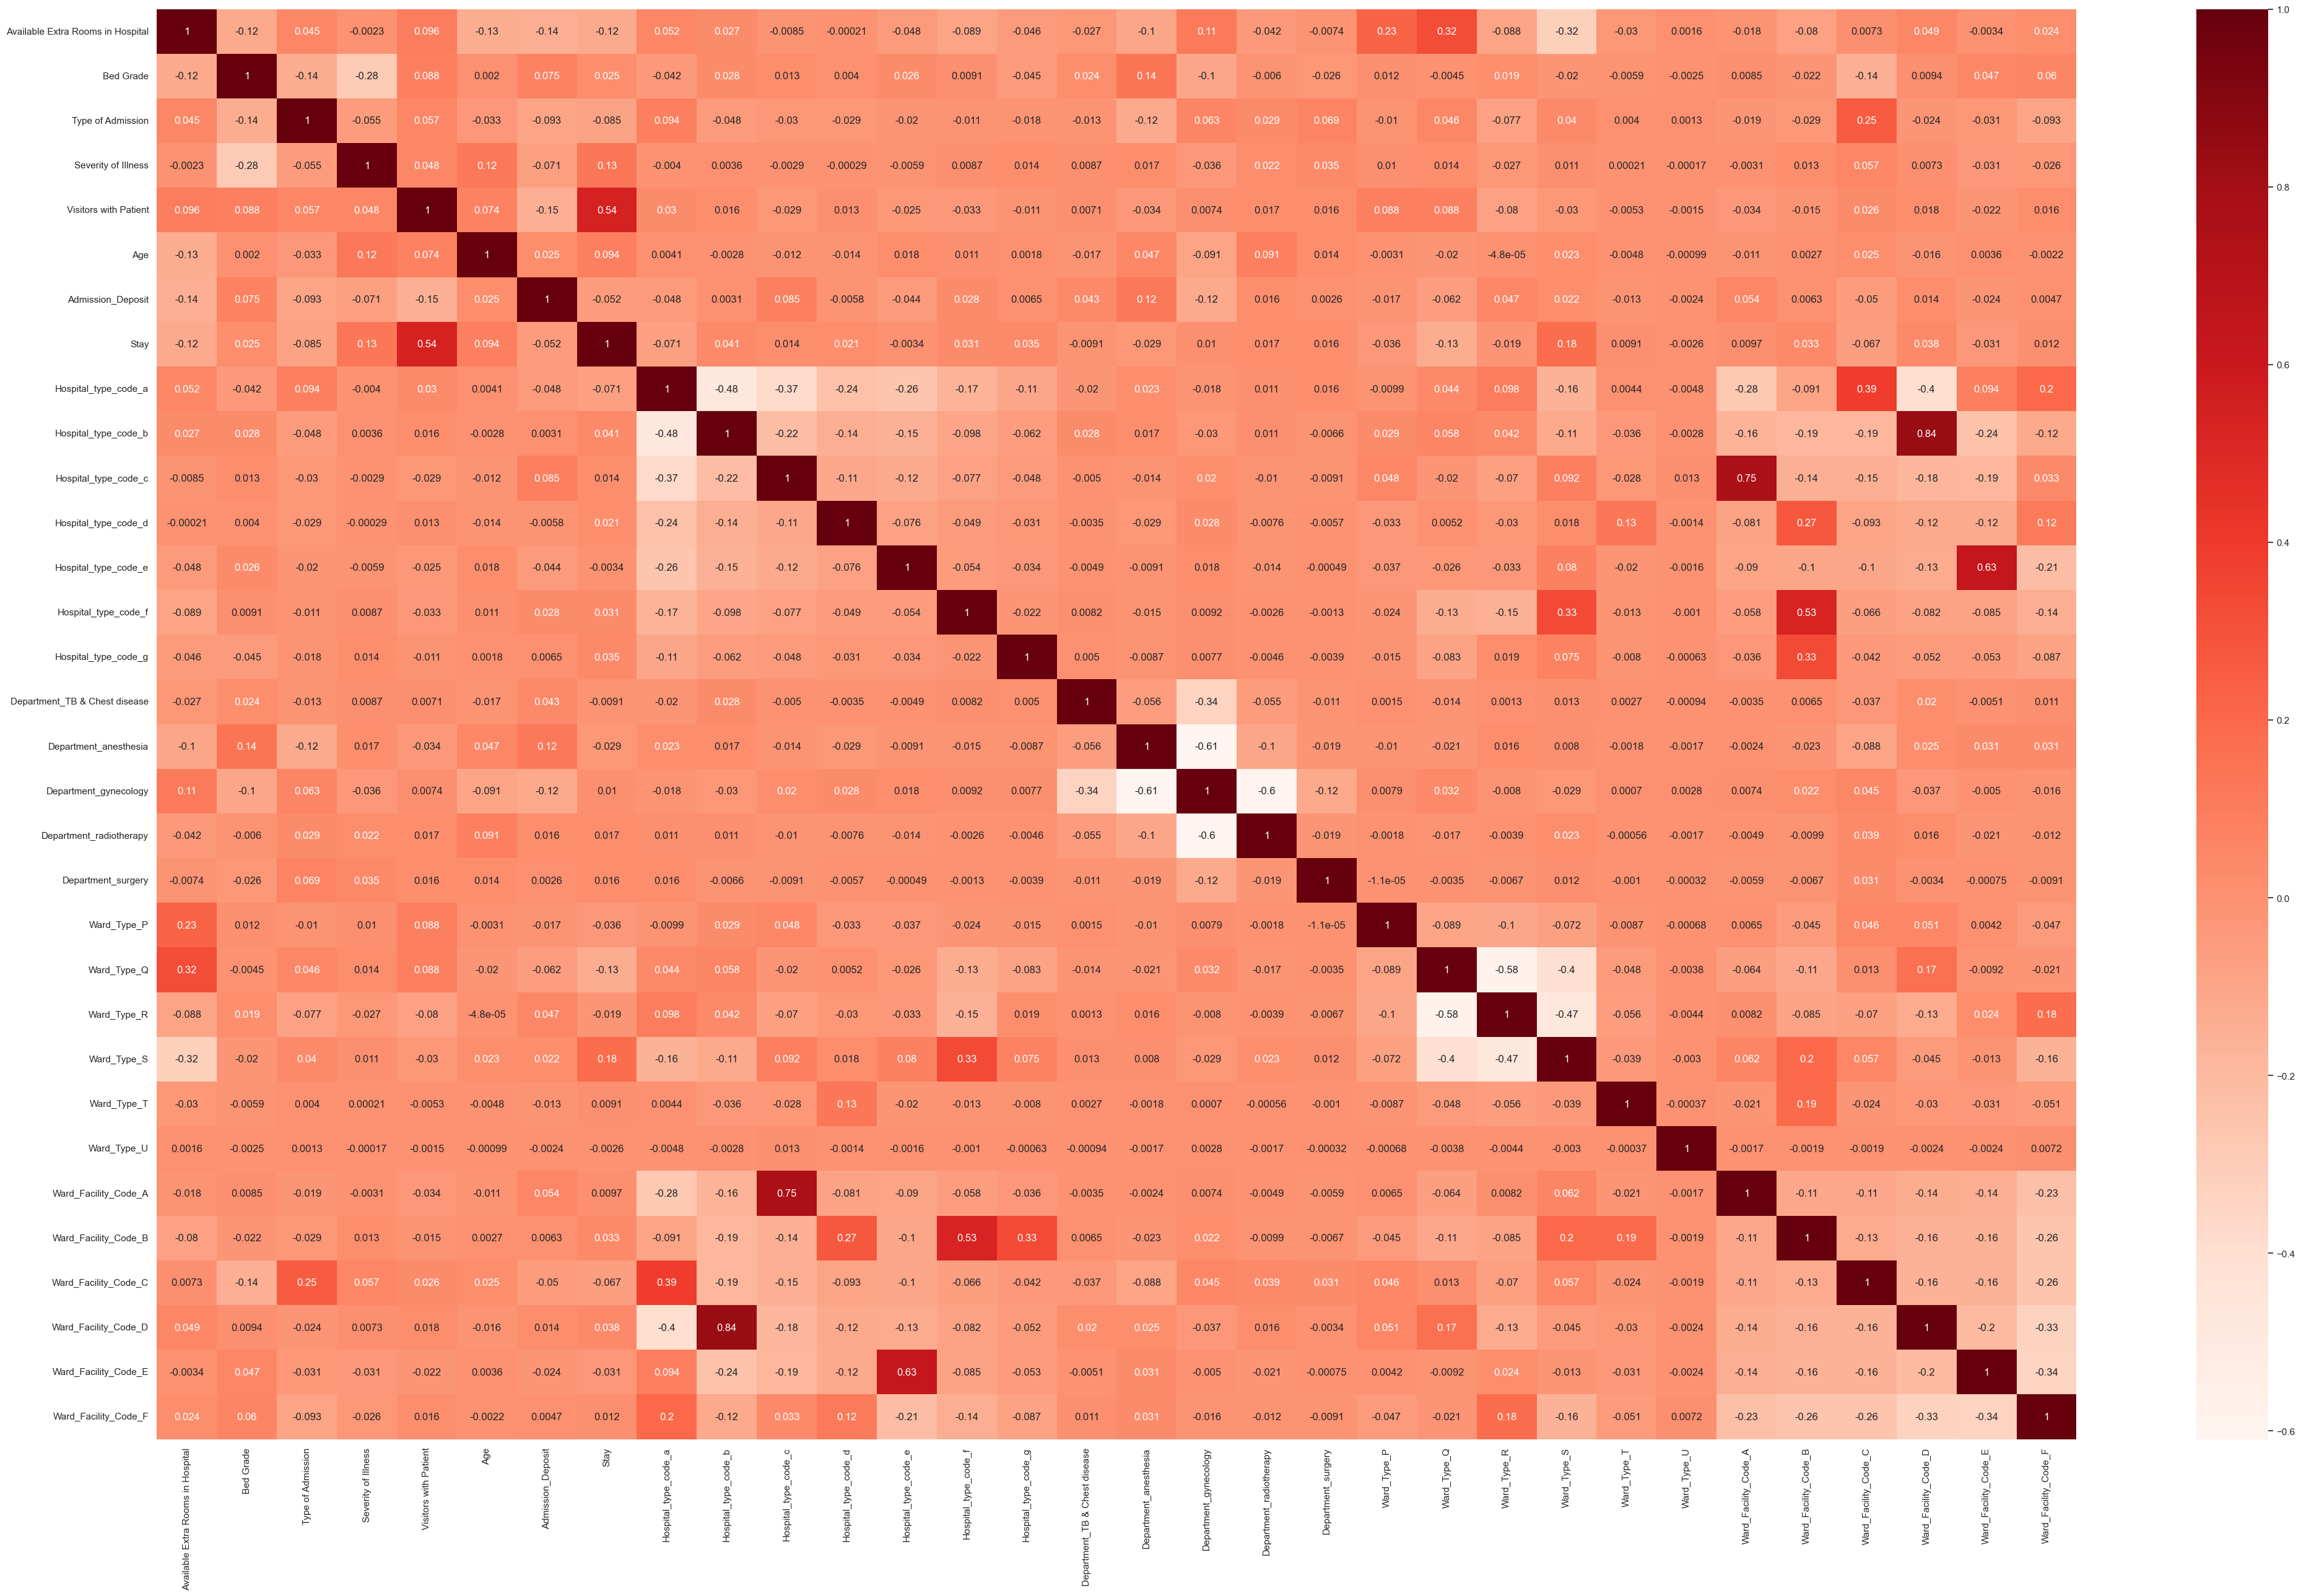

In [35]:
# draw the heatmap
sns.set()
plt.clf()
corr = df.corr()
plt.figure(figsize=(50,30))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

#### 2.3.3 Get feature relevance

This section utilizes the sequence forward feature selection (SFS) method. SFS is a greedy algorithm used to select the best feature subset, where it adds the most contributing feature to improving the prediction model's performance at each step.

In this method, some empty lists and sets are first defined to store the selected features and remaining features. Then, in the while loop, the code attempts to find the best feature from the remaining features, adds it to the list of selected features, and removes it from the set of remaining features.

To find the best feature, the code iterates through the remaining features, and for each feature, adds it to the existing selection of features, then performs multiple cross-validation experiments, calculating the F1 score (macro-average).

During this process, if a new feature can improve the model's F1 score, it is set as the "best feature" and updates the best F1 score and its associated score list.

The function finally returns a dictionary containing the selected features, their corresponding F1 scores, and the scores from each cross-validation iteration.

In [36]:
def forward_selection (X, y, model = tree.DecisionTreeClassifier (), times = 10, folds = 2):

    selected_features = []
    remaining_features = set(range(X.shape[1]))
    scores_until_now = []
    scores_folds_until_now = []
    
    while remaining_features:
        best_feature = None
        best_score = 0
        best_fold = []
        # This loop checks which one of the remaining feature performs the best when being added to the 
        # current selection of features
        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_subset = X[:, current_features] if isinstance(X, np.ndarray) else X.iloc[:, current_features]
            
            fold_scores = []
            # This does multiple times crossvalidation expriment
            # Note that you can use the same concept to train model when performing model comparison.
            for this_time in range (times):
                kf = StratifiedKFold (n_splits = folds, shuffle = True)
                fold_scores.extend (cross_val_score (model, X_subset, y, scoring = "f1_macro", cv = kf))
            
            score = np.median (fold_scores)
        
            # If doing train-validation method
            #X_train, X_test, y_train, y_test = train_test_split (X_subset, y, test_size = 0.2)
            #model.fit (X_train, y_train)
            #y_pred = model.predict (X_test)
            #score = f1_score (y_test, y_pred, average = "macro")
            
            if score > best_score:
                best_score = score
                best_feature = feature
                best_fold = fold_scores

        if best_feature is not None:
            selected_features.append (best_feature)
            remaining_features.remove (best_feature)
            scores_until_now.append  (best_score)
            scores_folds_until_now.append (best_fold)
        else:
            break

            
    fold_score_df = pd.DataFrame (scores_folds_until_now).T;
    fold_score_df.columns = list (x.columns);

    return {"features": selected_features, "scores": scores_until_now, "fold_scores": fold_score_df}

In [37]:
ret = forward_selection (x, y, tree.DecisionTreeClassifier (max_depth = 2), times = 5, folds = 2)

#### 2.3.4 Show the feature results.

In [38]:
# show the score
ret["fold_scores"]

,Available Extra Rooms in Hospital,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,...,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F
0,0.100008,0.115391,0.122503,0.133167,0.128909,0.073607,0.138272,0.137995,0.126989,0.103396,...,0.120778,0.145295,0.107153,0.106352,0.112201,0.118797,0.121985,0.150974,0.088635,0.086926
1,0.082263,0.127298,0.129367,0.101945,0.090799,0.074524,0.120710,0.081561,0.126104,0.125132,...,0.122923,0.127609,0.115787,0.115345,0.104769,0.084355,0.125710,0.104135,0.109867,0.098483
2,0.106138,0.114180,0.097567,0.144204,0.125825,0.094794,0.107280,0.127365,0.122168,0.097422,...,0.127495,0.102384,0.124951,0.117245,0.105419,0.118380,0.125818,0.106068,0.109873,0.082438
3,0.096000,0.109862,0.083823,0.126405,0.134633,0.130410,0.122606,0.132154,0.138834,0.126155,...,0.092317,0.093122,0.112739,0.108643,0.072146,0.099976,0.052214,0.081199,0.115795,0.096218
4,0.086272,0.092284,0.120931,0.088806,0.132602,0.139074,0.124459,0.129694,0.083170,0.120556,...,0.119530,0.086127,0.094942,0.121149,0.116284,0.107141,0.097388,0.120832,0.109775,0.122872
5,0.084470,0.103124,0.139718,0.133969,0.106662,0.124338,0.130738,0.119680,0.131546,0.131141,...,0.130547,0.136914,0.106421,0.108889,0.121826,0.112671,0.105699,0.107735,0.095369,0.112704
6,0.085443,0.134047,0.137841,0.136809,0.130888,0.126283,0.127087,0.121210,0.125690,0.147453,...,0.100077,0.099521,0.118084,0.121032,0.126028,0.066509,0.111450,0.084954,0.086402,0.088122
7,0.081555,0.133299,0.127040,0.124423,0.120172,0.123009,0.133619,0.101877,0.102557,0.118921,...,0.110751,0.138763,0.103761,0.086085,0.090884,0.077641,0.091316,0.105885,0.104477,0.092610
8,0.094730,0.104563,0.126465,0.092416,0.125566,0.135056,0.119444,0.131719,0.121821,0.118849,...,0.085749,0.115952,0.135437,0.115205,0.102254,0.123043,0.134901,0.108999,0.105291,0.106458
9,0.107177,0.115358,0.102830,0.132823,0.137877,0.117212,0.085926,0.088736,0.146106,0.097495,...,0.097294,0.115652,0.127255,0.075352,0.093254,0.110311,0.093344,0.100733,0.085066,0.082868


From viewing the table, we can see that the score gap between each attribute isn't significant. To visually represent the difference in scores between each attribute, we will proceed to visualize the data.

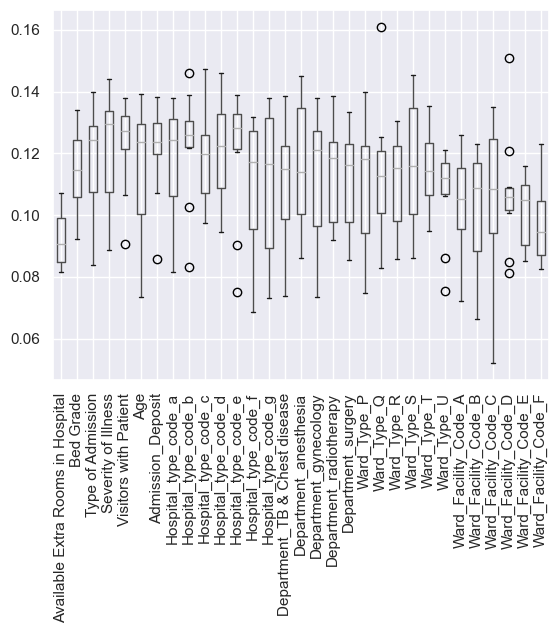

In [39]:
# show the boxplot of score
plt.clf()
ret["fold_scores"].boxplot (rot = 90)
plt.show()

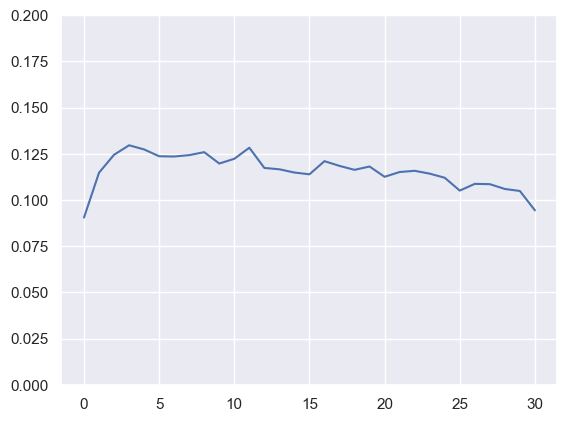

In [40]:
# Draw a line chart of the feature scores.
plt.clf()
plt.plot (ret["scores"])
plt.ylim ([0, 0.2])
plt.show()

Based on the chart and data analysis, there is not a significant difference in the impact among the various features. Therefore, we choose to include all features for model training.

### 2.4 Model Selection

This part involves selecting suitable training algorithms for model training. The following six different algorithms were primarily compared:

1. Decision tree based on entropy splitting.
2. Decision tree based on Gini coefficient splitting.
3. Random Froest
4. Gradient Boosting Classifiers
5. Naive Bayes
6. KNN algorithm.

Each section is divided into two main components: model training and model evaluation.

#### 2.4.1 Variable reserve

In [41]:
# get train set and test set
df_train, df_test = sklearn.model_selection.train_test_split (df, test_size = 0.20);

In [42]:
# the index of each column
ip_idx = list (range (0, df.shape[1])); # Just getting the index except the last column, as it is the target variavke
ip_idx.remove(7)
#  the name of each column
ip_attr_names = df.columns[ip_idx];

In [43]:
# index of target
target_idx = df.columns.get_loc('Stay');
# name of target
target = df.columns[target_idx];

In [44]:
x = df.iloc[:,df_idx]
y = df.iloc[:,df_target_idx]

In [45]:
# To make train, validation, test partition for example with 60, 20, 20 % ratio
# First we split the dataset in two partition, train and test, with test having the 40%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
# Now, we keep the X_test, y_test separate, This is the **final** test set.

# Now we futher partition train into a train and validation partition and another
# Note that in this case the full dataset is the training dataset from above, which is 80% of the data
# Below, 25% the 80% equals to 20% of the overall dataset
X_train, X_val, y_train, y_val = train_test_split (X_train, y_train, test_size = 0.25) # 0.25 x 0.8 = 0.2

#### 2.4.2 Decision Tree (entropy)

A decision tree is a supervised learning algorithm, mainly used for classification and regression tasks. Based on a tree structure, each node represents a feature (or attribute), each branch represents a decision rule, and each leaf node represents an output (result).

The main advantage of the decision tree is its high interpretability. The rules it represents are very intuitive and applicable in a variety of scenarios.

The decision tree construction process includes the following steps:

- Choose the best feature to split the dataset.
- Using that feature, divide the dataset into several subsets.
- Repeat this process for each subset until all instances belong to the same class, or there are no more features available.
- Each split represents a decision rule, thereby forming a decision tree.

Decision trees show excellent performance when dealing with a large number of features, including categorical and continuous feature data.

Information Entropy is a measure of uncertainty in a dataset, mainly used in decision tree algorithms to select the best feature to split the dataset. The higher the entropy, the greater the uncertainty in the dataset; the lower the entropy, the higher the purity of the dataset.

##### Train the model

In [46]:
clf_dt = tree.DecisionTreeClassifier (criterion = "entropy"); # Create algothim object, select "entropy" as the criteria for the split
m_dt = clf_dt.fit (df_train.iloc[:,ip_idx], df_train.iloc[:,target_idx]); # Fit the model given the input variables

pred_train_dt = m_dt.predict (df_train.iloc[:,ip_idx]); # Predict using training data
pred_test_dt  = m_dt.predict (df_test.iloc[:,ip_idx]);  # Predict using testing data

acc_train_dt = np.sum (pred_train_dt == df_train.iloc[:,target_idx].to_numpy ().T) / df_train.shape[0];
acc_test_dt  = np.sum (pred_test_dt  == df_test.iloc[:,target_idx].to_numpy ().T)  / df_test.shape[0];

print ("Training set accuracy: ", acc_train_dt, "\n");
print ("Test set accuracy: ", acc_test_dt,  "\n");

Training set accuracy:  0.9983070022387406 

Test set accuracy:  0.2866202457018117 



##### Evaluate the model

The model evaluation method used is the "train-validation-test" split and performance metrics (balanced accuracy and F1 score), which is a common strategy for model evaluation and selection.

First, the dataset is divided into a training set (60%), a validation set (20%), and a test set (20%). 

- The training set (`X_train`, `y_train`) is used to train the decision tree model.
- The validation set (`X_val`, `y_val`) is used during the training process for model selection and tuning of the model's hyperparameters.
- The test set (`X_test`, `y_test`) is kept independent and is used for the final evaluation of the model's performance.

In this project, multiple models are evaluated using F1 scores and balanced accuracy, and the model with the best performance is selected.

In [47]:
# create the algothim
clf = tree.DecisionTreeClassifier (criterion = "entropy");
# fit and predict the model
model       = clf.fit (X_train, y_train);
pred_train  = model.predict (X_train);
pred_val  = model.predict (X_val);

# get fi-score
f1_train_en = f1_score (y_train, pred_train, average = "macro");
f1_val_en = f1_score (y_val, pred_val, average = "macro");

# get balance accrucy
ba_train_en = balanced_accuracy_score (y_train, pred_train);
ba_val_en = balanced_accuracy_score (y_val, pred_val);

print ("Balance Accuracy on train set:", ba_train_en)
print ("Balance Accuracy on validation set:", ba_val_en)

print ("F1 Score on train set:", f1_train_en)
print ("F1 Score on validation set:", f1_val_en)

Balance Accuracy on train set: 0.9987446655936552
Balance Accuracy on validation set: 0.20225470109341936
F1 Score on train set: 0.9990395912673133
F1 Score on validation set: 0.20047088576972555


#### 2.4.3 Decision Tree (gini)

The Gini Index is also a measure of uncertainty in a dataset, similar to Information Entropy, and is mainly used in decision tree and random forest algorithms. It represents the probability that two randomly selected samples from the dataset belong to different categories. The lower the value, the higher the purity of the dataset.

##### Train the model

In [48]:
clf_dt_gini = tree.DecisionTreeClassifier (criterion = "gini"); # Create algothim object, select "gini" as the criteria for the split
m_dt_gini = clf_dt_gini.fit (df_train.iloc[:,ip_idx], df_train.iloc[:,target_idx]); # Fit the model given the input variables

pred_train_dt_gini = m_dt_gini.predict (df_train.iloc[:,ip_idx]); # Predict using training data
pred_test_dt_gini  = m_dt_gini.predict (df_test.iloc[:,ip_idx]);  # Predict using testing data

acc_train_dt_gini = np.sum (pred_train_dt_gini == df_train.iloc[:,target_idx].to_numpy ().T) / df_train.shape[0];
acc_test_dt_gini  = np.sum (pred_test_dt_gini  == df_test.iloc[:,target_idx].to_numpy ().T)  / df_test.shape[0];

print ("Training set accuracy: ", acc_train_dt_gini, "\n");
print ("Test set accuracy: ", acc_test_dt_gini,  "\n");

Training set accuracy:  0.9983070022387406 

Test set accuracy:  0.291384502621138 



##### Evaluate the model

In [49]:
# create the algothim
clf = tree.DecisionTreeClassifier (criterion = "gini");
# fit and predict the model
model       = clf.fit (X_train, y_train);
pred_train  = model.predict (X_train);
pred_val  = model.predict (X_val);

# get f1-score
f1_train_gini = f1_score (y_train, pred_train, average = "macro");
f1_val_gini = f1_score (y_val, pred_val, average = "macro");

# get balance accrucy
ba_train_gini = balanced_accuracy_score (y_train, pred_train);
ba_val_gini = balanced_accuracy_score (y_val, pred_val);

print ("Balance Accuracy on train set:", ba_train_gini)
print ("Balance Accuracy on validation set:", ba_val_gini)

print ("F1 Score on train set:", f1_train_gini)
print ("F1 Score on validation set:", f1_val_gini)

Balance Accuracy on train set: 0.9987446655936552
Balance Accuracy on validation set: 0.20307676813672584
F1 Score on train set: 0.9990395912673133
F1 Score on validation set: 0.2024323242158439


#### 2.4.4 Random Forest

Random Forest is a powerful and widely used machine learning algorithm. It is primarily an ensemble learning model, composed of multiple decision trees. Each tree is drawn from a different random subset, and the final prediction is determined by a voting mechanism.

Here are the basic operations:
- First, randomly select a portion of samples and features from the dataset and construct a decision tree.
- Repeat the first step N times to generate N decision trees.
- For classification problems, let N decision trees vote to reach the final prediction. For regression problems, usually use the average or median of the results from the N decision trees as the final prediction result.

The Random Forest model has many advantages. For example, it has good modeling results, strong capability to handle missing data and nonlinear data, and can be used to evaluate the importance of features. However, it also has some disadvantages, such as the model may be large, consuming a lot of memory and computational resources, and the model is difficult to interpret.

##### Find the best number of tree

For the random forest algorithm, the number of trees will affect the accuracy of the algorithm. Therefore, before comparing the models, the optimal number of trees is firstly selected and then the optimal random forest model is used for subsequent model comparisons. In this process, in order to enhance the training speed, I only chose `0-9` as training parameters.

In [50]:
ht_acc_train_rf = [];
ht_acc_test_rf  = [];

for k in range (1, 10):
    clf = RandomForestClassifier(n_estimators=k, random_state=2);
    m_es_rf = clf.fit (df_train.iloc[:,ip_idx], df_train.iloc[:,target_idx].to_numpy ().ravel ());
    pred_es_train_rf = m_es_rf.predict (df_train.iloc[:,ip_idx]); # Predict training data
    pred_es_test_rf  = m_es_rf.predict (df_test.iloc[:,ip_idx]);  # Predict testing data

    # Save the accuracy for train and test for each value of `k`
    ht_acc_train_rf.append (np.sum (pred_es_train_rf == df_train.iloc[:,target_idx].to_numpy ().T) / df_train.shape[0]);
    ht_acc_test_rf.append  (np.sum (pred_es_test_rf  == df_test.iloc[:,target_idx].to_numpy ().T)  / df_test.shape[0])

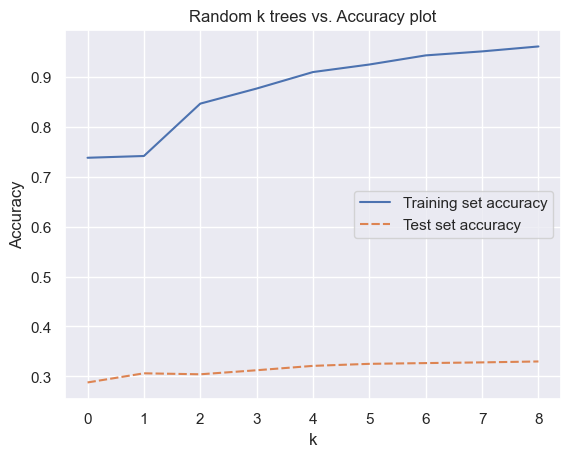

In [51]:
sns.set()
plt.clf()
sns.lineplot ({"Training set accuracy": ht_acc_train_rf, "Test set accuracy": ht_acc_test_rf});
plt.title ("Random k trees vs. Accuracy plot")
plt.xlabel ("k");
plt.ylabel ("Accuracy");
plt.show();

As shown in the figure, the best case is when k is 9.

##### Train the model

In [52]:
clf_dt_rf = RandomForestClassifier(n_estimators=9, random_state=2); 
m_dt_rf = clf_dt_rf.fit (df_train.iloc[:,ip_idx], df_train.iloc[:,target_idx]); # Fit the model given the input variables
pred_train_dt_rf = m_dt_rf.predict (df_train.iloc[:,ip_idx]); # Predict using training data
pred_test_dt_rf  = m_dt_rf.predict (df_test.iloc[:,ip_idx]);  # Predict using testing data

acc_train_dt_rf = np.sum (pred_train_dt_rf == df_train.iloc[:,target_idx].to_numpy ().T) / df_train.shape[0];
acc_test_dt_rf  = np.sum (pred_test_dt_rf  == df_test.iloc[:,target_idx].to_numpy ().T)  / df_test.shape[0];

print ("Training set accuracy: ", acc_train_dt_rf, "\n");
print ("Test set accuracy: ", acc_test_dt_rf,  "\n");

Training set accuracy:  0.96114470549806 

Test set accuracy:  0.3297056995809366 



##### Evluate the model

In [53]:
# create the algorthim
clf = RandomForestClassifier(n_estimators=9, random_state=2);
# fit and predict the model
model       = clf.fit (X_train, y_train);
pred_train  = model.predict (X_train);
pred_val  = model.predict (X_val);

# get f1-score
f1_train_rf = f1_score (y_train, pred_train, average = "macro");
f1_val_rf = f1_score (y_val, pred_val, average = "macro");

# get balance accrucy
ba_train_rf = balanced_accuracy_score (y_train, pred_train);
ba_val_rf = balanced_accuracy_score (y_val, pred_val);

print ("Balance Accuracy on train set:", ba_train_rf)
print ("Balance Accuracy on validation set:", ba_val_rf)

print ("F1 Score on train set:", f1_train_rf)
print ("F1 Score on validation set:", f1_val_rf)

Balance Accuracy on train set: 0.9494782662091024
Balance Accuracy on validation set: 0.2178785980814815
F1 Score on train set: 0.9625962845138986
F1 Score on validation set: 0.228264450370348


#### 2.4.5 Gradient Boosting Classifiers

Gradient Boosting Classifiers is a machine learning algorithm that is also valuable in regression analysis, and widely used in various fields, including web ranking and ecology. This is a boosting method, which means that the model is built in sequence, with each new model gradually correcting the errors of its predecessor.

The main working principle is:
- It starts with a basic weak prediction model (such as a decision tree) that predicts the training data.
- Gradient Boosting evaluates the errors of these initial predictions, and then creates a second model to predict these errors.
- Then it adds the second model's prediction to the first model, resulting in a second prediction, trying to reduce the prediction error.
- This process continues to reduce the error, creating new models, where each model tries to correct the error of the previous model.

Gradient Boosting Classifiers have some advantages over other models, such as being able to handle missing values automatically, not requiring data preprocessing, and being able to handle classification and continuous input variables well. However, this algorithm has some weaknesses, such as being susceptible to noise, easily overfitting, and the training time may be longer.

##### Train the model

In [54]:
clf_dt_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42);
m_dt_gb = clf_dt_gb.fit (df_train.iloc[:,ip_idx], df_train.iloc[:,target_idx]); # Fit the model given the input variables

pred_train_dt_gb = m_dt_gb.predict (df_train.iloc[:,ip_idx]); # Predict using training data
pred_test_dt_gb  = m_dt_gb.predict (df_test.iloc[:,ip_idx]);  # Predict using testing data

acc_train_dt_gb = np.sum (pred_train_dt_gb == df_train.iloc[:,target_idx].to_numpy ().T) / df_train.shape[0];
acc_test_dt_gb  = np.sum (pred_test_dt_gb  == df_test.iloc[:,target_idx].to_numpy ().T)  / df_test.shape[0];

print ("Training set accuracy: ", acc_train_dt_gb, "\n");
print ("Test set accuracy: ", acc_test_dt_gb,  "\n");

Training set accuracy:  0.3530517778468255 

Test set accuracy:  0.3546104941123982 



##### Evaluate the model

In [55]:
# create the algrothim
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42);
# fit and predict the model
model       = clf.fit (X_train, y_train);
pred_train  = model.predict (X_train);
pred_val  = model.predict (X_val);

# get f1-score
f1_train_gb = f1_score (y_train, pred_train, average = "macro");
f1_val_gb = f1_score (y_val, pred_val, average = "macro");

# get balance accrucy
ba_train_gb = balanced_accuracy_score (y_train, pred_train);
ba_val_gb = balanced_accuracy_score (y_val, pred_val);

print ("Balance Accuracy on train set:", ba_train_gb)
print ("Balance Accuracy on validation set:", ba_val_gb)

print ("F1 Score on train set:", f1_train_gb)
print ("F1 Score on validation set:", f1_val_gb)

Balance Accuracy on train set: 0.2211497098215639
Balance Accuracy on validation set: 0.2224200864092854
F1 Score on train set: 0.17396860245600804
F1 Score on validation set: 0.17433411287770603


#### 2.4.6 Naive Bayes

Naive Bayes is a class of supervised learning algorithms in machine learning that is based on Bayes' theorem and is primarily used for classification problems. Naive Bayes is called "naive" because it makes assumptions that all features are independent of each other, i.e., each feature contributes independently to the classification result. Although this assumption often does not hold in practice, the Naive Bayes algorithm still performs surprisingly well in many situations.

Specifically, the Naive Bayes classifier uses training data to estimate the probability of each category, as well as the probability of each feature appearing in each category. Then, when given a new input sample, the Naive Bayes classifier applies Bayes' theorem in combination with the previously calculated probabilities to predict which category this new sample is most likely to belong to.

The advantages of the Naive Bayes algorithm is that it is simple and easy to understand, fast in training and prediction, and suitable for high-dimensional and large-volume data sets. The disadvantage is that due to its assumption of independence, if there is a correlation between input features, the predictive performance may drop. Also, if the test data set has category features that are not in the training data set, Naive Bayes cannot make accurate predictions, which is also known as the zero-frequency problem.

##### Train the model

In [56]:
clf_dt_by = GaussianNB();
m_dt_by = clf_dt_by.fit (df_train.iloc[:,ip_idx], df_train.iloc[:,target_idx]); # Fit the model given the input variables

pred_train_dt_by = m_dt_by.predict (df_train.iloc[:,ip_idx]); # Predict using training data
pred_test_dt_by  = m_dt_by.predict (df_test.iloc[:,ip_idx]);  # Predict using testing data

acc_train_dt_by = np.sum (pred_train_dt_by == df_train.iloc[:,target_idx].to_numpy ().T) / df_train.shape[0];
acc_test_dt_by  = np.sum (pred_test_dt_by  == df_test.iloc[:,target_idx].to_numpy ().T)  / df_test.shape[0];

print ("Training set accuracy: ", acc_train_dt_by, "\n");
print ("Test set accuracy: ", acc_test_dt_by,  "\n");


Training set accuracy:  0.30845622505318004 

Test set accuracy:  0.30234707372647746 



##### Evaluate the model

In [57]:
# create the algrothim
clf = GaussianNB();
# fit and predict the model
model       = clf.fit (X_train, y_train);
pred_train  = model.predict (X_train);
pred_val  = model.predict (X_val);

# get f1-score
f1_train_by = f1_score (y_train, pred_train, average = "macro");
f1_val_by = f1_score (y_val, pred_val, average = "macro");

# get balance accrucy
ba_train_by = balanced_accuracy_score (y_train, pred_train);
ba_val_by = balanced_accuracy_score (y_val, pred_val);

print ("Balance Accuracy on train set:", ba_train_by)
print ("Balance Accuracy on validation set:", ba_val_by)

print ("F1 Score on train set:", f1_train_by)
print ("F1 Score on validation set:", f1_val_by)

Balance Accuracy on train set: 0.18712983065948674
Balance Accuracy on validation set: 0.18668303098618225
F1 Score on train set: 0.17135881083174526
F1 Score on validation set: 0.17039316778511313


#### 2.4.7 KNN

KNN, short for K-Nearest Neighbors, is a fundamental and widely used machine learning algorithm that can be applied to classification and regression problems.

In the KNN algorithm, when predicting a new input sample, it considers the K closest samples in the training set. K is a parameter that needs to be predetermined by the user. These closest samples are considered to be the "nearest neighbors."

In classification problems, KNN usually determines the category of the new sample based on the majority category of these K nearest neighbors; in regression problems, KNN typically takes the average of the target values of these K nearest neighbors as the predicted value for the new sample.

The definition of "closeness" is usually determined by some distance metric, with common ones being the Euclidean distance and Manhattan distance.

The advantage of KNN is that the model is simple and easy to understand and use. However, the disadvantage is the high computational complexity and space complexity, especially when the training dataset is large, and the choice of K value directly affects the performance of the model.

##### Normalzation

Using the KNN model requires standardized data, so variable preparation needs to be redone.

In [58]:
stander_df_train, stander_df_test = sklearn.model_selection.train_test_split (stander_df, test_size = 0.20);

##### Find the best k

The core of the KNN algorithm is to make predictions based on the neighbors surrounding the data points. Therefore, for the KNN algorithm, the number of neighbors will affect the accuracy of the algorithm. A smaller k value makes the model more susceptible to the influence of noisy data, while a larger k value may lead to the inclusion of irrelevant data points in the calculation. Therefore, before comparing models, the optimal k value should be chosen first for model training.

In [59]:
ht_acc_train_knn = [];
ht_acc_test_knn  = [];

for k in range (1, 10):
    clf = neighbors.KNeighborsClassifier (n_neighbors = k);
    m_knn = clf.fit (stander_df_train.iloc[:,ip_idx], stander_df_train.iloc[:,target_idx].to_numpy ().ravel ());
    pred_train_knn = m_knn.predict (stander_df_train.iloc[:,ip_idx]); # Predict training data
    pred_test_knn  = m_knn.predict (stander_df_test.iloc[:,ip_idx]);  # Predict testing data

    # Save the accuracy for train and test for each value of `k`
    ht_acc_train_knn.append (np.sum (pred_train_knn == stander_df_train.iloc[:,target_idx].to_numpy ().T) / stander_df_train.shape[0]);
    ht_acc_test_knn.append  (np.sum (pred_test_knn  == stander_df_test.iloc[:,target_idx].to_numpy ().T)  / stander_df_test.shape[0])

Plot the results of the k values on a graph and choose the k value based on the chart.

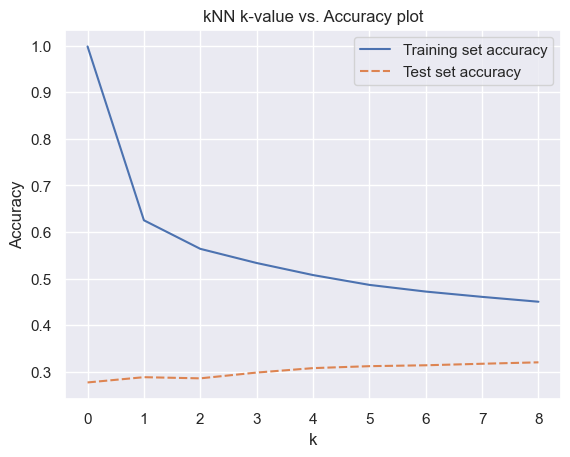

In [60]:
sns.set()
plt.clf()
sns.lineplot ({"Training set accuracy": ht_acc_train_knn, "Test set accuracy": ht_acc_test_knn});
plt.title ("kNN k-value vs. Accuracy plot")
plt.xlabel ("k");
plt.ylabel ("Accuracy");
plt.show();

The results are shown in the graph, and the differences are actually minimal. We will choose `k=9` as our parameter.

##### Train the model
Based on the value of k, use the k-nearest neighbors (KNN) algorithm to calculate the model.

In [61]:
clf_knn = neighbors.KNeighborsClassifier (n_neighbors = 9); # Create algothim object, select "entropy" as the criteria for the split
m_knn = clf_knn.fit (stander_df_train.iloc[:,ip_idx], stander_df_train.iloc[:,target_idx].to_numpy ().ravel ()); # Fit the model given the input variables

pred_train_knn = m_knn.predict (stander_df_train.iloc[:,ip_idx]); # Predict training data
pred_test_knn  = m_knn.predict (stander_df_test.iloc[:,ip_idx]);  # Predict testing data

acc_train_knn = np.sum (pred_train_knn == stander_df_train.iloc[:,target_idx].to_numpy ().T) / stander_df_train.shape[0];
acc_test_knn  = np.sum (pred_test_knn  == stander_df_test.iloc[:,target_idx].to_numpy ().T)  / stander_df_test.shape[0];

print ("Training set accuracy: ", acc_train_knn, "\n");
print ("Test set accuracy: ", acc_test_knn,  "\n");

Training set accuracy:  0.45038919030888247 

Test set accuracy:  0.3203365254385825 



In [62]:
x_stander = stander_df.iloc[:,ip_idx]
y_stander = stander_df.iloc[:,target_idx]

##### Evaluate the model

In [63]:
# change the x and y to stander

X_train, X_test, y_train, y_test = train_test_split(x_stander, y_stander, test_size = 0.20)

X_train, X_val, y_train, y_val = train_test_split (X_train, y_train, test_size = 0.25) # 0.25 x 0.8 = 0.2

# create the algrothim
clf_knn = neighbors.KNeighborsClassifier (n_neighbors = 1);
# fit and predict the model
model       = clf_knn.fit (stander_df_train.iloc[:,ip_idx],stander_df_train.iloc[:,target_idx].to_numpy ().ravel ());
pred_train  = model.predict (X_train);
pred_val  = model.predict (X_val);

# get f1-score
f1_train_knn = f1_score (y_train, pred_train, average = "macro");
f1_val_knn = f1_score (y_val, pred_val, average = "macro");

# get balance accrucy
ba_train_knn = balanced_accuracy_score (y_train, pred_train);
ba_val_knn = balanced_accuracy_score (y_val, pred_val);

print ("Balance Accuracy on train set:", ba_train_knn)
print ("Balance Accuracy on validation set:", ba_val_knn)

print ("F1 Score on train set:", f1_train_knn)
print ("F1 Score on validation set:", f1_val_knn)

Balance Accuracy on train set: 0.834815530066651
Balance Accuracy on validation set: 0.840157050008803
F1 Score on train set: 0.8406457505984327
F1 Score on validation set: 0.8441574034777538


#### 2.4.8 Result Valization

Next, visualize the obtained data to compare and evaluate the models. The comparison will mainly focus on the following three aspects: 
- Model accuracy; 
- Model average accuracy; 
- Model F1 score.

It's important to note that when the accuracy or performance of the training set significantly exceeds that of the testing or validation set, it may indicate the occurrence of overfitting in the model. By visualizing multiple models, a better-performing model can be selected as the training result.

##### Accrucy of model 

<Figure size 640x480 with 0 Axes>

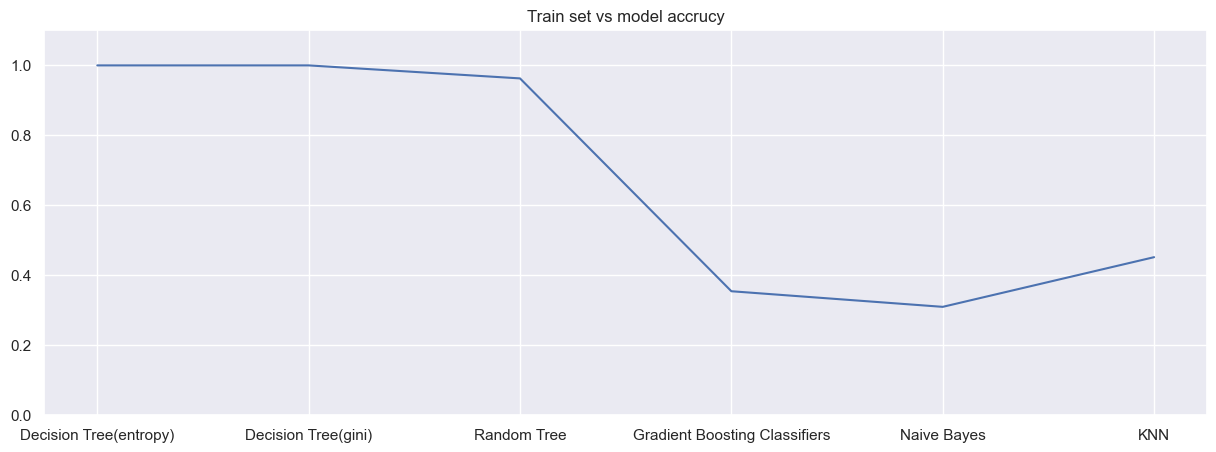

In [64]:
# train set
sns.set()
plt.clf()
#set x
x_train=["Decision Tree(entropy)","Decision Tree(gini)","Random Tree","Gradient Boosting Classifiers","Naive Bayes","KNN"]
#set y

y_train=[acc_train_dt,acc_train_dt_gini,acc_train_dt_rf,acc_train_dt_gb,acc_train_dt_by,acc_train_knn]
plt.figure(figsize=(15,5))
plt.title ("Train set vs model accrucy")
plt.plot(x_train,y_train)
plt.ylim ([0, 1.1])
plt.show()

According to the line chart, it can be observed that for the training set, the decision tree, random forest have higher accuracy, while the performance of the naive bayes,knn and gradient boosting classifiers model is poorer.

<Figure size 640x480 with 0 Axes>

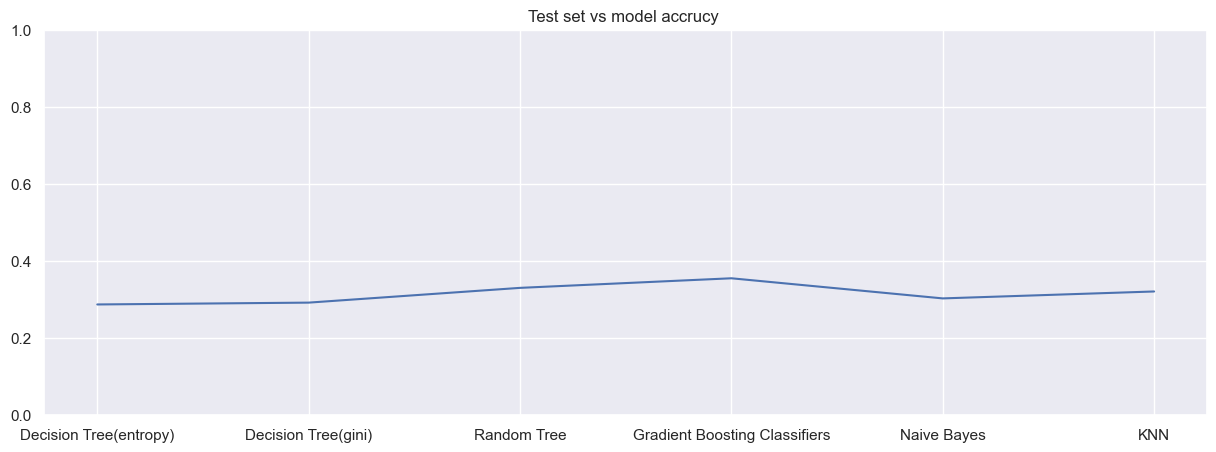

In [65]:
# test set
sns.set()
plt.clf()
#set x
x_test=["Decision Tree(entropy)","Decision Tree(gini)","Random Tree","Gradient Boosting Classifiers","Naive Bayes","KNN"]
#set y
y_test=[acc_test_dt,acc_test_dt_gini,acc_test_dt_rf,acc_test_dt_gb,acc_test_dt_by,acc_test_knn]
plt.figure(figsize=(15,5))
plt.title ("Test set vs model accrucy ")
plt.plot(x_test,y_test)
plt.ylim ([0, 1])
plt.show()

According to the line chart, it can be observed that all models have the similar accrucy.

##### Balance Accuracy 

In deep learning, "average precision" usually refers to the average of classification accuracies calculated across multiple categories. It is one of the metrics used to evaluate the performance of multi-class classification models.

- A high average precision indicates that the model performs well in multi-class classification tasks. This means that the model can accurately classify samples from multiple categories and has a high level of classification accuracy. 
- A low average precision indicates poor performance in multi-class classification tasks. This may suggest that the model makes a significant number of errors when classifying samples from multiple categories, resulting in lower overall accuracy.

However, it is important to note that average precision does not provide detailed information about the accuracy of individual categories. It serves as a general performance measure and may obscure low precisions in specific categories. In some cases, the model may perform well in certain categories but poorly in others, leading to a low average precision.

Therefore, in addition to average precision, it is important to analyze the precision of individual categories in detail to understand the model's performance in each category. This can help us gain a better understanding of the model's classification performance across different categories.

<Figure size 640x480 with 0 Axes>

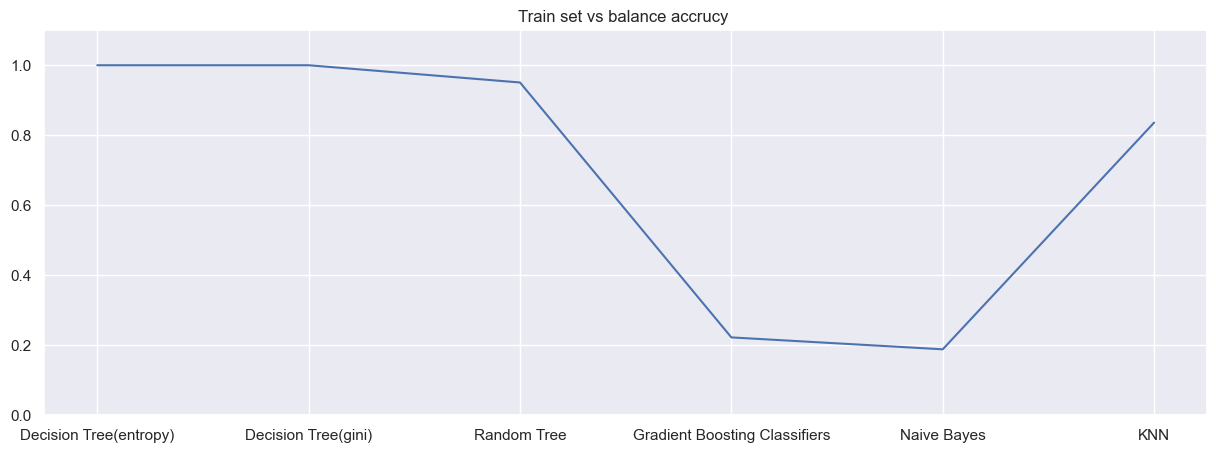

In [66]:
# train set
sns.set()
plt.clf()
#set x
x_train_b=["Decision Tree(entropy)","Decision Tree(gini)","Random Tree","Gradient Boosting Classifiers","Naive Bayes","KNN"]
#set y
y_train_b=[ba_train_en,ba_train_gini,ba_train_rf,ba_train_gb,ba_train_by,ba_train_knn]

plt.figure(figsize=(15,5))
plt.title ("Train set vs balance accrucy ")
plt.plot(x_train_b,y_train_b)
plt.ylim ([0, 1.1])
plt.show()

According to the line chart, it can be observed that for the training set, the decision tree, random forest, and KNN models have higher average accuracy, while the performance of the naive bayes and gradient boosting classifiers model is poorer.

<Figure size 640x480 with 0 Axes>

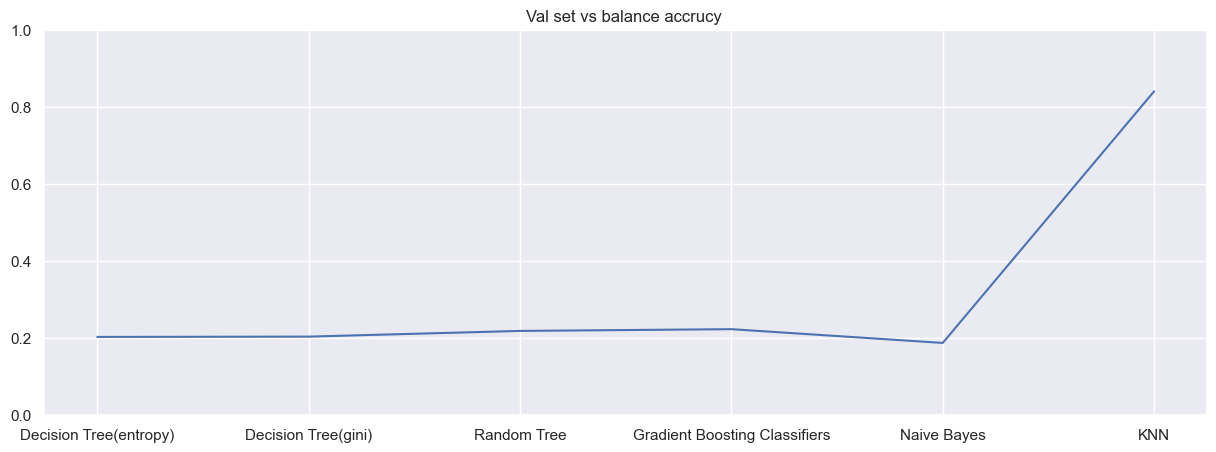

In [82]:
# validation set
sns.set()
plt.clf()
#set x
x_train_b=["Decision Tree(entropy)","Decision Tree(gini)","Random Tree","Gradient Boosting Classifiers","Naive Bayes","KNN"]
#set y
y_train_b=[ba_val_en,ba_val_gini,ba_val_rf,ba_val_gb,ba_val_by,ba_val_knn]
plt.figure(figsize=(15,5))
plt.title ("Val set vs balance accrucy ")
plt.plot(x_train_b,y_train_b)
plt.ylim ([0, 1])
plt.show()

According to the line chart, it can be observed that for the validation set, just the KNN models have higher average accuracy, and others are all poor.

##### F1 Score

The F1 score is a metric used to measure the performance of a classification model. It is the harmonic mean of precision and recall. The F1 score ranges between 0 and 1, where a score closer to 1 indicates better model performance, while a score closer to 0 indicates poorer model performance.

- When the F1 score is high, it means that the classification model has achieved a good balance between precision and recall, and is able to identify positive and negative samples well. This may indicate that the model can simultaneously achieve high accuracy and high coverage in its predictions, which is an ideal outcome for classification tasks.

- When the F1 score is low, it indicates that there is a significant imbalance between precision and recall, and the model makes more errors in identifying positive or negative samples. This may be due to a high false positive rate or false negative rate, or a combination of both. In some cases, a low F1 score may indicate poor model performance, requiring further improvement.

It is important to note that the interpretation of F1 score should be combined with the specific problem and data at hand. In some scenarios, a higher emphasis on precision or recall may be more important, while in other scenarios, the ability to balance both may be crucial. Therefore, decision-makers need to consider F1 score in conjunction with other relevant metrics to evaluate model performance.

<Figure size 640x480 with 0 Axes>

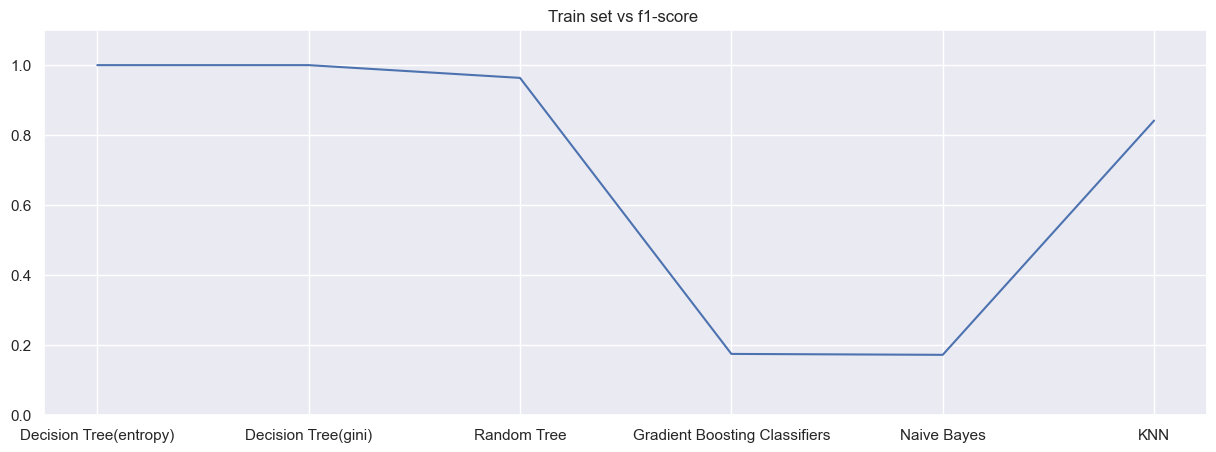

In [68]:
# Train set
sns.set()
plt.clf()
#set x
x_train_b=["Decision Tree(entropy)","Decision Tree(gini)","Random Tree","Gradient Boosting Classifiers","Naive Bayes","KNN"]
#set y
y_train_b=[f1_train_en,f1_train_gini,f1_train_rf,f1_train_gb,f1_train_by,f1_train_knn]
plt.figure(figsize=(15,5))
plt.title ("Train set vs f1-score ")
plt.plot(x_train_b,y_train_b)
plt.ylim ([0, 1.1])
plt.show()

According to the line chart, it can be observed that for the training set, the decision tree, random forest, and KNN models have higher f1-score, while the performance of the naive bayes and gradient boosting classifiers model is poorer.

<Figure size 640x480 with 0 Axes>

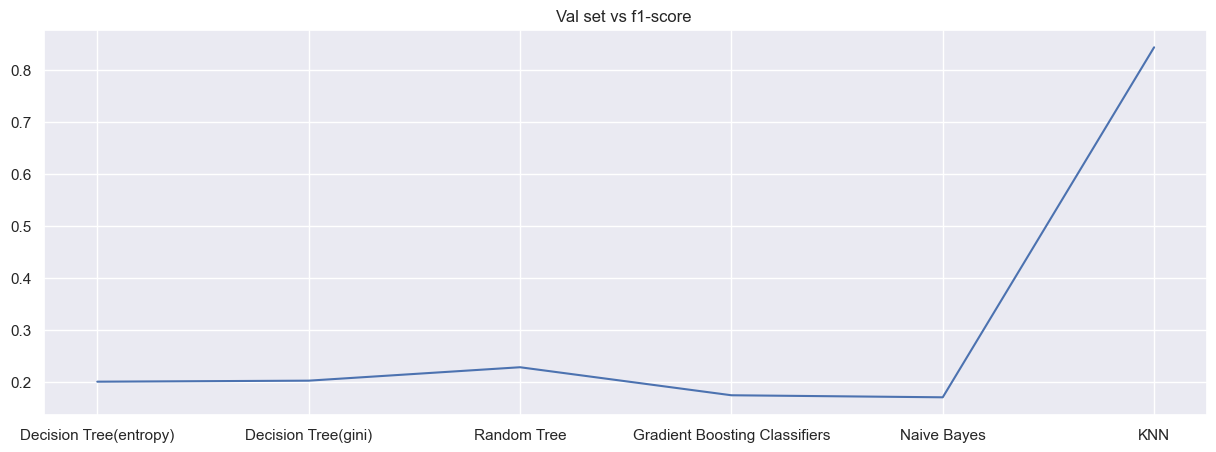

In [69]:
# validation set
sns.set()
plt.clf()
#set x
x_train_b=["Decision Tree(entropy)","Decision Tree(gini)","Random Tree","Gradient Boosting Classifiers","Naive Bayes","KNN"]
#set y
y_train_b=[f1_val_en,f1_val_gini,f1_val_rf,f1_val_gb,f1_val_by,f1_val_knn]
plt.figure(figsize=(15,5))
plt.title ("Val set vs f1-score ")
plt.plot(x_train_b,y_train_b)
plt.show()

According to the line chart, it can be observed that for the validation set, just the KNN models have higher f1-score, and others are all poor.

##### Summary

According to the table, both the decision tree and random forest exhibit significantly higher performance on the training set compared to the test set or validation set, indicating overfitting. Amongst the other models, KNN demonstrates consistently strong performance in various metrics, especially in terms of average accuracy and F1 score. Therefore, KNN(`m_knn`) is chosen as the final model.

|                              | Decision Tree(entroy) | Decision Tree(gini) | Random Tree | Gradient Boosting Classifiers | Naive Bayes | KNN  |
| ---------------------------- | --------------------- | ------------------- | ----------- | ----------------------------- | ----------- | ---- |
| Accrucy of train set         | 0.99                  | 0.99                | 0.96        | 0.35                          | 0.30        | 0.45 |
| Accrucy of test set          | 0.28                  | 0.29                | 0.32        | 0.34                          | 0.30        | 0.32 |
| Balance Accrucy of train set | 0.99                  | 0.99                | 0.94        | 0.22                          | 0.18        | 0.83 |
| Balance Accrucy of test set  | 0.22                  | 0.20                | 0.21        | 0.22                          | 0.18        | 0.84 |
| F1-score of train set        | 0.99                  | 0.99                | 0.96        | 0.17                          | 0.17        | 0.84 |
| F1-score of test set         | 0.20                  | 0.20                | 0.22        | 0.17                          | 0.17        | 0.84 |


### 2.5 Result and Discussion

#### 2.5.1 Test prediction scenario

After successfully selecting the model, attempts were made to use the chosen model to make predictions on some of the data.

In [70]:
# set which used to be predicted
test = stander_df[:10]
test

,Available Extra Rooms in Hospital,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Hospital_type_code_a,Hospital_type_code_b,...,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F
0,0.125000,0.333333,1.0,1.0,0.0625,0.555556,0.337858,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.083333,0.333333,0.0,1.0,0.0625,0.555556,0.451129,4,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.083333,0.333333,0.0,1.0,0.0625,0.555556,0.319831,3,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.083333,0.333333,0.0,1.0,0.0625,0.555556,0.594266,4,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.083333,0.333333,0.0,1.0,0.0625,0.555556,0.408123,4,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.083333,0.333333,0.0,1.0,0.0625,0.555556,0.287685,1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.041667,0.666667,1.0,1.0,0.0625,0.555556,0.474262,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.166667,0.666667,0.0,1.0,0.0625,0.555556,0.409535,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.083333,1.000000,0.0,1.0,0.0625,0.555556,0.588944,5,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.083333,0.666667,0.0,1.0,0.0625,0.555556,0.462207,3,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [71]:
# the result of prediction
predict = m_knn.predict(test.iloc[:,ip_idx])
predict

array([2, 2, 5, 3, 5, 2, 1, 4, 1, 7], dtype=int64)

As the table shows, unfortunately, the model only successfully predicted 1 in 10 data points.

| 1   | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| 0 | 4 | 3 | 4 | 4 | 1 | 0 | 4 | 5 | 3 |
| 2 | 2 | 5 | 3 | 5 | 2 | 1 | 4 | 1 | 7 |


#### 2.5.2 Finding nearest neighbors

As the selected model was KNN, attempts were made to explore the relationship between a certain point and its neighbors.

In [72]:
df_temp = stander_df.copy()
df_temp = df_temp.drop("Stay",axis = 1)

In [73]:
# assume new_point is a new point to search
new_point = df_temp.iloc[[0]]
new_point

,Available Extra Rooms in Hospital,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,...,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F
0,0.125,0.333333,1.0,1.0,0.0625,0.555556,0.337858,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [75]:
# get the distances of neighbor and the index of neighbor
distances, indices = m_knn.kneighbors(new_point)

In [80]:
# show the distance
distances

array([[0.12017108, 0.24024517, 0.33344373, 0.35478213, 0.39616264,
        0.50325405, 0.51035307, 0.51389261, 0.51498964]])

In [81]:
# show the neighbor
nearest_neighbors_data = df_temp.iloc[indices[0]]
nearest_neighbors_data

,Available Extra Rooms in Hospital,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,...,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F
173727,0.083333,0.666667,1.0,0.0,0.12500,0.222222,0.373262,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
200187,0.125000,0.666667,0.5,0.0,0.18750,0.333333,0.113597,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
224861,0.125000,0.333333,0.0,0.5,0.06250,0.777778,0.334926,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
154110,0.083333,0.666667,1.0,0.5,0.18750,0.333333,0.207320,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9122,0.208333,0.666667,0.0,0.0,0.12500,0.333333,0.343288,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
55923,0.166667,0.000000,0.0,1.0,0.09375,0.444444,0.245113,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
228362,0.166667,0.333333,1.0,0.0,0.06250,0.444444,0.244136,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
117059,0.083333,0.000000,1.0,0.0,0.06250,0.777778,0.317659,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33028,0.166667,0.666667,1.0,0.5,0.18750,0.333333,0.210143,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


After data comparison, it can be known that the features between neighboring points have a certain overlap, which reflects that the points with similar features are very close in the space of model training.

## 3 Conclusion

The implementation of this project has given me a deep understanding and practical experience of the entire machine learning process. This process includes data preprocessing, feature selection, model selection, training, and evaluation.

- During the data preprocessing stage, it's crucial to ensure the quality and integrity of the data, which includes cleaning up the data, filling in missing values, identifying, and handling outliers. This forms the foundations of properly applying machine learning and ensures the efficiency and accuracy of the subsequent model training.

- In the feature selection stage, we need to pick out the features that have the most significant impact on the model's prediction results from all the features, reduce unnecessary features, prevent overfitting, and improve the model's accuracy.

- The model selection stage involves choosing the model that is most suitable for solving a specific problem. It usually involves comparing and choosing among multiple machine learning algorithms and deciding the best model based on its performance.

- The model training stage includes using existing training data to train the model, and seeking the best model parameters through repeated iteration and optimization.

- The evaluation stage involves thoroughly testing the model's performance based on pre-set evaluation criteria such as accuracy rate, precision rate, etc., to determine whether the model can yield satisfactory prediction results.

This project has given me an-depth understanding of these processes that I did not have before, making me more familiar with various steps and details in machine learning. This will be of great help to my future work.